### This dialogue will use the functions generated in 00_core to create a blog but with a revised structure.  Its content is intended to be implementation using the tools and functions developed in 00_core

> Fill in a module description here

In [ ]:
#| default_exp blog

In [ ]:
#| hide
from nbdev.showdoc import *

### Imports

In [ ]:
#| export
from fastlite import Database
from pathlib import Path
from datetime import datetime, timedelta
import my_blog.config as config
from urllib.parse import quote, unquote
from fasthtml.common import *
from monsterui.all import *
from fasthtml_auth import AuthManager
from fasthtml.jupyter import *
import re
import frontmatter

In [ ]:
from my_blog.core import *

Are they the same class? True


#### Initial considerations

#| export
Title: personal-site/app.py at main · jackhogan/personal-site

URL Source: https://github.com/jackhogan/personal-site/blob/main/app.py


Collapse file tree
------------------

Files
-----

main

Search this repository

*         content  
*         posts  
*         static  
*       .gitignore  
*       LICENSE  
*       README.md  
*       app.py  
*       pyproject.toml  
*       uv.lock  

Breadcrumbs
-----------

1.   [personal-site](https://github.com/jackhogan/personal-site/tree/main)

/
app.py
======

Copy path

Blame More file actions

Blame More file actions

Latest commit
-------------

[![Image 1: jackhogan](https://avatars.githubusercontent.com/u/33831061?v=4&size=40)](https://github.com/jackhogan)[jackhogan](https://github.com/jackhogan/personal-site/commits?author=jackhogan)

[text edits](https://github.com/jackhogan/personal-site/commit/000bbacd1f5ac268c18d4eddba70c0cb12e626c9)

success

Dec 2, 2025

[000bbac](https://github.com/jackhogan/personal-site/commit/000bbacd1f5ac268c18d4eddba70c0cb12e626c9)·Dec 2, 2025

History
-------

[History](https://github.com/jackhogan/personal-site/commits/main/app.py)

Open commit details

[](https://github.com/jackhogan/personal-site/commits/main/app.py)

298 lines (259 loc) · 19.3 KB

Breadcrumbs
-----------

1.   [personal-site](https://github.com/jackhogan/personal-site/tree/main)

/
app.py
======

Top


[Raw](https://github.com/jackhogan/personal-site/raw/refs/heads/main/app.py)


import re, frontmatter, mistletoe as mst

from collections import Counter

from datetime import datetime

from fasthtml.common import*

from fastlite import*

from monsterui.all import*

from urllib.parse import quote, unquote

hdrs= (*Theme.slate.headers(highlightjs=True),

Link(rel="icon", href="/static/favicon.ico"),

Script(src="https://unpkg.com/hyperscript.org@0.9.12"),

Link(rel="preconnect", href="https://fonts.googleapis.com"), Link(rel="preconnect", href="https://fonts.gstatic.com", crossorigin=""),

Link(rel="stylesheet", href="https://fonts.googleapis.com/css2?family=IBM+Plex+Sans:wght@400;500;600;700&family=IBM+Plex+Mono&display=swap"),

Style("body { font-family: 'IBM Plex Sans', sans-serif; } code, pre { font-family: 'IBM Plex Mono', monospace; }"))

app=FastHTML(hdrs=hdrs)

app.mount("/static", StaticFiles(directory="static"), name="static")

rt=app.route

db=database("data/subscribers.db")

class Subscriber: id:int; email:str; created_at:str

subscribers=db.create(Subscriber, transform=True)

def theme_toggle():

return Button(UkIcon("moon", cls="dark:hidden"), UkIcon("sun", cls="hidden dark:block"),

_="""on click

 toggle .dark on <html/>

 set franken to (localStorage's __FRANKEN__ or '{}') as Object

 if the first <html/> matches .dark set franken's mode to 'dark' else set franken's mode to 'light' end

 set localStorage's __FRANKEN__ to franken as JSON""",

cls="p-1 hover:scale-110 shadow-none", type="button")

def x_icon(): return Svg(ft_hx("path", d="M12.6.75h2.454l-5.36 6.142L16 15.25h-4.937l-3.867-5.07-4.425 5.07H.316l5.733-6.57L0 .75h5.063l3.495 4.633L12.601.75Zm-.86 13.028h1.36L4.323 2.145H2.865z"), width=20, height=20, fill="currentColor", viewBox="0 0 16 16", aria_hidden="true")

def social_link(k, v):

ext=dict(rel="nofollow noindex") if k=="mail"else {} if k=="rss"else dict(target="_blank", rel="noopener noreferrer")

return A(x_icon() if k=="twitter"else UkIcon(k, width=20, height=20), href=v, aria_label=k.title(), cls="hover:text-primary transition-colors", **ext)

socials=dict(github="https://github.com/jackhogan", twitter="https://x.com/j_h0gan", linkedin="https://www.linkedin.com/in/hogan-jack/", rss="/rss.xml", mail="/contact")

ftr_content=Div(*[social_link(k,v) for k,v in socials.items()], cls="flex justify-center gap-6 text-muted-foreground")

def hx_attrs(target="#main-content"): return dict(hx_target=target, hx_push_url="true", hx_swap="innerHTML show:window:top")

def hx_link(txt, href, cls="text-primary underline", target="#main-content", **kw):

return A(txt, href=href, hx_get=href, cls=cls, **hx_attrs(target), **kw)

def navbar():

menu_id,btn_id=f"menu-{unqid()}",f"btn-{unqid()}"

brand=A(Img(src="/static/images/pixelated_portrait.png", alt="Jack Hogan", cls="w-6 h-6 rounded-full"), Span("Jack Hogan"), href="/", hx_get="/", cls="flex items-center gap-2 text-lg font-bold", **hx_attrs())

def navlinks(_=None): return [hx_link(txt, f"/{txt.lower()}", cls="hover:scale-110", _=_) for txt in ["About", "Blog", "Now"]]

hamburger=Button(UkIcon("menu", width=30, height=30), cls="p-0 border-0 shadow-none", _=f"on click toggle .hidden on #{menu_id}", type="button", id=btn_id)

return Nav(cls="border rounded-lg shadow backdrop-blur-md bg-background/98")(

Div(brand, Div(*navlinks(), theme_toggle(), cls="hidden md:flex items-center space-x-4 ml-auto"),

Div(theme_toggle(), hamburger, cls="flex md:hidden items-center gap-4 ml-auto"), cls="flex items-center p-4"),

Div(*navlinks(_=f"on click add .hidden to #{menu_id}"), cls="flex flex-col space-y-4 p-4 text-center hidden", id=menu_id, _=f"on click elsewhere if event.target.closest('#{btn_id}') is null add .hidden to me")

 )

def layout(*content, htmx, title=None):

if htmx and htmx.request: return (Title(title), *content)

main=Main(*content, cls='w-full max-w-2xl mx-auto px-6 py-8 space-y-8', id="main-content")

ctr_cls='w-full max-w-2xl mx-auto'

return Title(title), Div(cls="flex flex-col min-h-screen")(

Div(navbar(), cls=f'{ctr_cls} px-4 sticky top-0 z-50 mt-4'),

main,

Footer(Divider(), ftr_content, cls=f'{ctr_cls} px-6 mt-auto mb-6')

 )

class Post:

def __init__ (self, path):

self.path,self.slug= (p:=Path(path)),p.stem

self.content,self.meta= (post:=frontmatter.load(path)).content,post.metadata

self.title,self.date,self.excerpt,self.tags=self.meta['title'],self.meta['date'],self.meta.get('excerpt',''),L(self.meta.get('tags', []))

self.datestr=self.date.strftime('%d %b %Y')

self.external_url=self.meta.get('external_url')

def get_posts(n=None):

if not (posts_dir:=Path('posts')).exists(): return []

posts=posts_dir.ls(file_exts='.md').map(Post).sorted(key=lambda p: p.date, reverse=True)

return posts[:n] if n else posts

def tag_pill(tag, selected=None, avail=None, link=False):

base="text-xs px-2 py-1 rounded border transition-all"

if tag is None:

return ft_hx("button", UkIcon("x", width=12, height=12), "Clear", cls=f"{base} flex items-center gap-1 cursor-pointer hover:shadow-sm", **hx_attrs("#posts-list"), hx_get="/blog")

if selected is None:

if not link: return Span(tag, cls=f"{base} bg-muted")

url=f"/blog?tags={quote(tag)}"

hx=hx_attrs() if link==True else hx_attrs("#posts-list")

return A(tag, href=url, cls=f"{base} bg-muted hover:bg-primary/20", hx_get=url, **hx)

new=','.join(quote(t) for t in selected^ {tag})

url=f"/blog?tags={new}"if new else"/blog"

hx=hx_attrs("#posts-list")

if tag in selected: return A(tag, href=url, cls=f"{base} bg-primary cursor-pointer text-primary-foreground", hx_get=url, **hx)

if avail and tag in avail: return A(tag, href=url, cls=f"{base} cursor-pointer bg-muted hover:bg-primary/20", hx_get=url, **hx)

return Span(tag, cls=f"{base} opacity-30 cursor-not-allowed")

def tag_filter(selected, all_posts, filtered):

counts=Counter(all_posts.attrgot('tags').concat())

if not counts: return Div(id="tag-filter")

avail=set(filtered.attrgot('tags').concat())

tags=sorted(counts, key=lambda t: (-counts[t], t))

btns= [tag_pill(t, selected, avail) for t in tags]

if selected: btns.append(tag_pill(None))

return Div(Span("Filter:", cls="text-sm font-medium mr-1"), *btns, cls="border-b pb-4 flex flex-wrap items-center gap-2", id="tag-filter")

def post_card(p):

date_and_tags=Div(Span(p.datestr, cls="text-sm text-muted-foreground"),

Div(*p.tags.map(partial(tag_pill, link='htmx')), cls="flex gap-2 flex-wrap"),

cls="flex justify-between items-center")

content=Div(H3(hx_link(p.title, blogpost.to(slug=p.slug), cls="")), P(p.excerpt, cls="text-muted-foreground leading-relaxed"), date_and_tags,

cls='space-y-2 border-b -mb-4 pb-4 group-hover:border-transparent transition-all')

return Li(content, hx_get=blogpost.to(slug=p.slug), hx_trigger="click[!event.target.closest('a') && !getSelection().toString()]",

cls="group p-4 -mx-4 hover:rounded-lg hover:shadow-md transition-all cursor-pointer", **hx_attrs())

def subscribe_form():

return Div(

P("Subscribe via ", A("RSS", href="/rss.xml", cls="text-primary underline"), " or enter your email to get notified of new posts directly in your inbox", cls="text-sm text-muted-foreground mb-2"),

Form(Input(type="email", name="email", placeholder="your@email.com", required=True, cls="flex-1 rounded-l-md"), Button("Subscribe", cls=(ButtonT.primary, "rounded-l-none rounded-r-md")), cls="flex", hx_post="/subscribe", hx_swap="outerHTML"),

cls="mt-6")

def blog_section():

if not (posts:=get_posts(3)): return Div()

def item(p): return Div(hx_link(p.title, blogpost.to(slug=p.slug), cls="hover:underline font-medium"), Span(p.datestr, cls="text-muted-foreground text-sm whitespace-nowrap"), cls="flex justify-between items-baseline gap-4 py-2 border-b")

return Section(Div(H3("Latest Posts", cls="text-2xl font-semibold"), hx_link("View all →", blog), cls="flex justify-between items-baseline mb-4"), *posts.map(item), subscribe_form(), cls="border rounded-lg shadow bg-muted p-4")

def work_item(role, org, years, logo_light, logo_dark=None):

logo_dark=logo_dark or logo_light

img_cls="w-6 h-6 rounded object-contain"

imgs= (Img(src=f"/static/images/logos/{logo_light}", alt=org, cls=f"{img_cls} dark:hidden"),

Img(src=f"/static/images/logos/{logo_dark}", alt=org, cls=f"{img_cls} hidden dark:block"))

return Div(Div(*imgs, Span(org, cls="font-medium"), cls="flex items-center gap-2"),

Div(Span(role, cls="text-muted-foreground text-sm"),

Span(cls="flex-1 border-b border-dotted"),

Span(years, cls="text-muted-foreground text-sm whitespace-nowrap"), cls="flex items-baseline gap-2"),

cls="flex flex-col gap-1 py-2")

def work_section():

roles= [("Founding AI Research Scientist", "Agemo AI", "2024–2025", "codewords_dark.png", "codewords_light.png"),

 ("Co-founder and CEO", "Shoji", "2020–2022", "shoji_dark.png", "shoji_light.png"),

 ("PhD Statistical Machine Learning", "Imperial College London", "2017–2023", "imperial.png")]

return Section(

H3("Work", cls="text-2xl font-semibold mb-4"),

*[work_item(*r) for r in roles],

P("Check out my ", hx_link("About", about), " page or my ", A("CV", href="/static/CV_Jack_Hogan.pdf", cls="text-primary underline", target="_blank"), " for more details.", cls="text-sm text-muted-foreground mt-4")

 )

def intro():

return Article(

H3("Welcome", cls="text-2xl font-semibold mb-4"),

Div(cls="text-base text-muted-foreground leading-relaxed space-y-4")(

P("I'm an AI research scientist based in London, UK."),

P("This website is both an excuse to teach myself web development and part of an effort to write more, as a way of solidifying and sharing my thoughts about the topics that interest me. It will most likely cover machine learning, software engineering, startups and entrepreneurship; we'll see what else."),

P("To learn more about me, check out my ", hx_link("About", about), " page. ",

"See my latest blog posts below or find the full list on my ", hx_link("Blog", blog), " page. ",

"Or to find out what I'm up to currently, check out my ", hx_link("Now", now), " page."),

 )

 )

def span_token(name, pat, attr, prec=5):

class T(mst.span_token.SpanToken):

precedence,parse_inner,parse_group,pattern=prec,False,1,re.compile(pat)

def __init__ (self, match): setattr(self, attr, match.group(1))

T. __name__ =name

return T

 .dark .sidenote.hl { background-color: rgba(96, 165, 250, 0.1); }

}

""")

def from_md(content, img_dir='/static/images'):

content, footnotes=extract_footnotes(content)

mods= {'pre': 'border border-gray-300 rounded-md my-4', 'p': 'text-base leading-relaxed mb-6', 'li': 'text-base leading-relaxed',

'ul': 'uk-list uk-list-bullet space-y-2 mb-6 ml-6 text-base', 'ol': 'uk-list uk-list-decimal space-y-2 mb-6 ml-6 text-base', 'hr': 'border-t border-border my-8'}

rendered=render_md(content, class_map_mods=mods, img_dir=img_dir, renderer=partial(ContentRenderer, FootnoteRef, YoutubeEmbed, footnotes=footnotes))

return Div(sidenote_css, rendered, cls="w-full")

@rt

def index(htmx): return layout(intro(), blog_section(), work_section(), title="Jack Hogan - Home", htmx=htmx)

@rt

def about(htmx):

content=Path('content/about.md').read_text()

_, body_md=content.split('\n', 1)

img=Img(src="/static/images/portrait.jpg", alt="Jack Hogan", cls="w-2/5 md:w-1/3 float-left mr-4 md:mr-6 mb-4 rounded-lg")

return layout(H2("About"), Div(img, from_md(body_md)), title="Jack Hogan - About", htmx=htmx)

@rt

def now(htmx):

post=frontmatter.load('content/now.md')

updated=post.metadata.get('updated')

updated_str=updated.strftime('%B %d, %Y') if updated else None

content=re.sub(r'^#\s+.+\n', '', post.content, count=1)

header=Div(H2("Now"), Span(f"Last updated: {updated_str}", cls="text-sm text-muted-foreground") if updated_str else None, cls="flex justify-between items-baseline")

return layout(header, from_md(content), title="Jack Hogan - Now", htmx=htmx)

@rt

def blog(htmx, tags:str=None):

selected= {unquote(t.strip()) for t in (tags or'').split(',') if t.strip()}

all_posts=get_posts()

filtered=all_posts.filter(lambda p: selected<=set(p.tags))

posts_content=Ul(*filtered.map(post_card), cls="list-none") if filtered else Div(P("No posts found matching those tags.", cls="text-muted-foreground"), cls="py-8 text-center")

posts_div=Div(posts_content, id="posts-list")

tag_filt=tag_filter(selected, all_posts, filtered)

if htmx and htmx.target=="posts-list":

tag_filt.attrs['hx-swap-oob'] ='true'

return posts_div, tag_filt

return layout(H2("Blog"), tag_filt, posts_div, subscribe_form(), title="Jack Hogan - Blog", htmx=htmx)

@rt('/blog/{slug}')

def blogpost(htmx, slug:str):

post_path=Path('posts') /f'{slug}.md'

if not post_path.exists(): return layout(H1("Post Not Found", cls="text-4xl font-bold mb-4"), P("Sorry, this blog post doesn't exist."), title="Post Not Found", htmx=htmx)

p=Post(post_path)

if p.external_url: return Response(headers={"HX-Redirect": p.external_url})

content=re.sub(r'^#\s+.+\n', '', p.content, count=1)

tags=Div(*p.tags.map(partial(tag_pill, link=True)), cls="flex gap-2 flex-wrap") if p.tags else None

return layout(Article(H1(p.title, cls="text-3xl font-bold mb-3"),

Div(Span(p.date.strftime("%B %d, %Y"), cls="text-muted-foreground text-sm"), tags, cls="flex justify-between items-center mb-8 flex-wrap gap-4"),

from_md(content, img_dir=f'/static/images/posts/{slug}'), cls="mb-8"),

title=f"Jack Hogan - {p.title}", htmx=htmx)

@rt

def subscribe(email:str):

if list(subscribers.rows_where("email = ?", [email], limit=1)): return P("You're already subscribed!", cls="text-sm text-muted-foreground mt-6")

subscribers.insert(Subscriber(email=email, created_at=datetime.now().isoformat()))

return P("Thanks for subscribing!", cls="text-sm text-green-600 mt-6")

@rt('/rss.xml')

def rss_feed():

base,posts="https://jackhogan.net",get_posts()

def item(p): return f"<item><title>{p.title}</title><link>{base}/blog/{p.slug}</link><guid>{base}/blog/{p.slug}</guid><pubDate>{p.date.strftime('%a, %d %b %Y %H:%M:%S +0000')}</pubDate><description><![CDATA[{p.excerpt}]]></description>{''.join(f'<category>{t}</category>'for t in p.tags)}</item>"

items=''.join(item(p) for p in posts if not p.external_url)

rss=f'<?xml version="1.0" encoding="UTF-8"?><rss version="2.0" xmlns:atom="http://www.w3.org/2005/Atom"><channel><title>Jack Hogan</title><link>{base}</link><description>AI research, software engineering, startups and more</description><language>en-us</language><lastBuildDate>{posts[0].date.strftime('%a, %d %b %Y %H:%M:%S +0000') if posts else""}</lastBuildDate><atom:link href="{base}/rss.xml" rel="self" type="application/rss+xml"/>{items}</channel></rss>'

return Response(rss, media_type="application/rss+xml")

@rt

def contact(): return RedirectResponse(f'mailto:{os.environ.get('EMAIL')}', status_code=302)

serve()

Footer
------

[](https://github.com/) © 2026 GitHub,Inc. 

### Footer navigation

*   [Terms](https://docs.github.com/site-policy/github-terms/github-terms-of-service)
*   [Privacy](https://docs.github.com/site-policy/privacy-policies/github-privacy-statement)
*   [Security](https://github.com/security)
*   [Status](https://www.githubstatus.com/)
*   [Community](https://github.community/)
*   [Docs](https://docs.github.com/)
*   [Contact](https://support.github.com/?tags=dotcom-footer)
*    Manage cookies 
*    Do not share my personal information 

 You can’t perform that action at this time.

In [ ]:
#| hide
import nbdev

I have developed a blog site based upon the above Jack Hogan site using HTML.  The raw functions needed are in the library my-blog.core. Can you access that using dialogue tools?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>
<summary>symfiles_package(sym='my_blog.core')</summary>

```json
{
  "id": "toolu_01PyxiiaouKjS5pXtaBf2mEz",
  "call": {
    "function": "symfiles_package",
    "arguments": {
      "sym": "my_blog.core"
    }
  },
  "result": "\"SymbolNotFound(Symbol 'my_blog' not found. Consider using `importmodule` first.)\""
}
```

</details>

Let me import the module first:

<details class='tool-usage-details'>
<summary>importmodule(mod='my_blog.core')</summary>

```json
{
  "id": "toolu_01XgHttw3FEFupWoAA1GHxk3",
  "call": {
    "function": "importmodule",
    "arguments": {
      "mod": "my_blog.core"
    }
  },
  "result": "None"
}
```

</details>



<details class='tool-usage-details'>
<summary>symfiles_package(sym='my_blog.core')</summary>

```json
{
  "id": "toolu_01Veg5kjUTCnNsJ3owdtCWfF",
  "call": {
    "function": "symfiles_package",
    "arguments": {
      "sym": "my_blog.core"
    }
  },
  "result": "'<documents><document index=\"1\"><src>\\n/app/data/my-blog/my_blog/__init__.py\\n</src><document-content>\\n__version__ = \"0.0.1\"\\n</document-content></document><document index=\"2\"><src>\\n/app/data/my-blog/my_blog/blog.py\\n</src><document-content>\\n# AUTOGENERATED! DO NOT EDIT! File to edit: ../nbs/01_blog_v2.ipynb.\\n\\n# %% auto #0\\n__all__ = [\\'AppState\\', \\'create_database_tables\\', \\'create_post_database\\', \\'create_app\\', \\'intro\\', \\'hx_attrs\\', \\'hx_link\\', \\'navbar\\',\\n           \\'layout\\', \\'index\\', \\'about\\', \\'blog\\', \\'x_icon\\', \\'social_link\\', \\'footer\\', \\'slug_exists\\', \\'add_post<TRUNCATED>"
}
```

</details>

I've retrieved your `my_blog` package. Here's a summary of what's in `my_blog.core`:

**Key components:**

1. **`AppState`** - dataclass holding database connections (posts, tags, post_tags tables), auth manager, and user db
2. **`create_app()`** - sets up FastHTML app with MonsterUI theming, authentication, and static file mounting
3. **`app`, `state`, `srv`, `rt`** - module-level instances created on import

**Layout/UI functions:**
- `navbar()`, `layout()`, `footer()`, `intro()` - page structure components
- `hx_attrs()`, `hx_link()` - HTMX helper functions

**Blog functionality:**
- `get_posts(n, tags)` - retrieves posts with optional tag filtering
- `get_post_tags(post_id)` - gets tags for a post
- `add_post()` - creates/updates posts with tags
- `post_card()` - renders post summary with thumbnail
- `tag_pill()`, `tag_filter()`, `tag_badge()` - tag filtering UI

**Routes:** `index`, `about`, `blog`, `blogpost`, plus `/admin/upload` for post uploading

**Upload handling:**
- `process_upload()` - handles markdown and image files
- `rewrite_image_paths()` - fixes image paths in markdown

I notice there's also `blog.py` which seems to duplicate much of `core.py`. Are you working on migrating to a revised structure in this dialog? What would you like to work on?

blog.py is the export from this file, which nbdev has created.  The tail end of this file is a copy of the notebook used to create  the core file, and so that is the one to use for now.  The purpose of this dialogue is to change the structure of the site a bit and then to implement it without the mess of development that is in the original core.  In particular, the original intro is more relevant to a personal blog of the form Jack is following, in my case i am not trying to sell myself but the content of the blog, with a short bit about myself and more about the sort of content of the blog and an illustration of my motorhome and maybe a bike.  The about section then needs creating and I can add more about me there

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That makes sense - shifting from a "personal brand" style intro to a content-focused one with lifestyle imagery (motorhome, bike) is a nice direction.

Let's tackle this in steps. For the **intro section**, what kind of content will your blog focus on? Knowing the themes will help craft the right messaging. For example:
- Travel/adventure?
- Technical topics?
- A mix of interests?

And do you already have the images of your motorhome and bike ready, or is that something to sort out later?

The blog has tags created to highlight the different areas of interest, these are cycling, motorhome trips, coding and technology.  Probably most of it will be cycling trips and motorhome trips with embedded images, you tube links and links to Strava routes or google map routes etc.  I do have a question for now though.  In the core module I had to include rt, app srv, but then when the library is imported it creates the app etc, which is not what I want.  How can I avoid this.  I recall vaguely in another appliction I added something to represent things such as app, rt, but these were placeholders from the module __init__.py file (I think).  How can I achieve this?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great topic mix! The lazy initialization pattern you're thinking of is likely using `__getattr__` in `__init__.py` for deferred creation.

There are two common approaches:

**1. Factory function (simplest):** Don't create `app`, `rt`, `srv` at module level - only in a `create_app()` function that returns them when called explicitly.

**2. Lazy `__getattr__`:** In `__init__.py`:

```python
_app = _rt = _srv = None

def __getattr__(name):
    global _app, _rt, _srv
    if name in ('app', 'rt', 'srv'):
        if _app is None:
            _app, _rt, _srv, _ = create_app()
        return {'app': _app, 'rt': _rt, 'srv': _srv}[name]
    raise AttributeError(f"module {__name__!r} has no attribute {name!r}")
```

Which approach feels more natural for your use case? The factory function is cleaner if you want explicit control over when things are created, while `__getattr__` gives you the convenience of `from my_blog import app` syntax but delays creation until first access.

I can certainly avoid creating the real rt, app in the module, that is why i created the create_app function, however, if you look further down the file the index function needs a @rt decorator, and unless I created rt this would trigger an error.  I don't think the factory function would solve this problem

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Ah yes, good point! The `@rt` decorator needs to exist at import time even though the real app doesn't.

The solution is a **deferred decorator** pattern - a placeholder that collects the decorated functions, then registers them when `create_app()` is actually called.

The basic idea:

```python
_routes = []  # Collect decorated functions

def rt(path=None):
    def decorator(func):
        _routes.append((path, func))
        return func
    return decorator
```

Then in `create_app()`, you iterate through `_routes` and register them with the real router.

Does this approach make sense? If so, I can help you work through adapting it to your existing `create_app()` function.

Yes we could do that, it seems like quite a lot of additional compliction.  My reason for having this file separate to the other it that there is a lot of iteration there that shows why and how things were developed and I don't want to lose the history. Another solution would be to simply copy that file and remove all but the final functions, then create the app and rt early on so that they can be used directly.  I am wondering if the additional complication of doing it this way is worthwhile.  I do like the idea of separating the development of the core functions from the final implementation

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That's a sensible pragmatic consideration. The tradeoffs:

**Deferred pattern:** Clean separation, but adds complexity and indirection that can be hard to debug.

**Simple copy with early app/rt creation:** Straightforward, easy to understand, works well if this notebook *is* the final implementation that gets run directly.

Given your goal is separating clean implementation from development history, the simple approach seems fine - you get that separation without over-engineering. The deferred pattern is more valuable when you need the module to be importable *without* side effects (e.g., for testing or using just the helper functions elsewhere).

Would you ever need to import functions from this module without creating the app? If not, the simple approach wins on clarity.

Yes lets do that

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Let's start with the first piece - the route collector. In your `core.py`, near the top (after imports), you'd add:

```python
_routes = []

def rt(path=None):
    def decorator(func):
        _routes.append((path or f'/{func.__name__}', func))
        return func
    return decorator
```

This captures the path and function, storing them for later registration.

Does this make sense so far? Once you've got that in place, we'll modify `create_app()` to loop through `_routes` and register them with the real router.

I intend to store posts in a database, though I guess the raw images might be in the static folder if that makes sense.  The blog will be about coding, cycling, motorhome tours and anything else I would like to cover. Its going to be single author


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That makes sense—markdown content in the database, images in `/static/images/posts/` (maybe organized by post slug or date).

**Suggested workflow:**

1. **Author in Obsidian or VS Code** — write markdown with image links like `![caption](/static/images/posts/my-trip/photo1.jpg)`
2. **Copy images to static folder** manually or with a simple script
3. **Store markdown + metadata in database** — a `posts` table with columns like `slug`, `title`, `content`, `excerpt`, `created_at`, `tags`
4. **Render on request** using `render_md` from MonsterUI or mistletoe

For a single-author blog, you could even build a simple admin page in FastHTML to paste in your markdown and save to the database—no need for a full CMS.

Want to start by sketching out the database schema, or the authoring/admin workflow first?

I do have my own pip library for authorising and controlling access as well as setting up databased:
Title: GitHub - fromLittleAcorns/fasthtml_toolbox: Complete authentication system for FastHTML applications - available on PyPI as fasthtml-auth

URL Source: https://github.com/fromLittleAcorns/fasthtml_toolbox

Markdown Content:
FastHTML-Auth
-------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#fasthtml-auth)
**Complete authentication system for FastHTML applications with built-in admin interface**

Drop-in authentication with beautiful UI, role-based access control, and a powerful admin dashboard for user management. No configuration required – just install and go!

pip install fasthtml-auth

[![Image 1: PyPI version](https://camo.githubusercontent.com/59ec79ac3ff0f765c15c738ef3b8fe23c5a58d422019826f4cd9a0ffae8d2a33/68747470733a2f2f62616467652e667572792e696f2f70792f6661737468746d6c2d617574682e737667)](https://badge.fury.io/py/fasthtml-auth)[![Image 2: Python 3.8+](https://camo.githubusercontent.com/bd7bcdc70784bad7073b66850c51f4fed5dc3b2fc782277551b9013c7d27f043/68747470733a2f2f696d672e736869656c64732e696f2f62616467652f707974686f6e2d332e382b2d626c75652e737667)](https://www.python.org/downloads/)

* * *

⭐ Key Features
--------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-key-features)
*   🔐 **Complete Authentication** - Login, logout, registration with secure bcrypt hashing
*   👑 **Built-in Admin Interface** - Full user management dashboard (NEW!)
*   🎨 **Beautiful UI** - Responsive MonsterUI components, zero custom CSS needed
*   🛡️ **Role-Based Access** - User, Manager, Admin roles with decorators
*   📱 **Mobile Ready** - Works perfectly on all devices
*   ⚡ **Zero Config** - Works out of the box, customize as needed

* * *

🚀 Quick Start
--------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-quick-start)
### Basic Authentication

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#basic-authentication)

from fasthtml.common import *
from monsterui.all import *
from fasthtml_auth import AuthManager

# Initialize auth system
auth = AuthManager(db_path="data/app.db")
db = auth.initialize()
beforeware = auth.create_beforeware()

# Create app
app = FastHTML(before=beforeware, hdrs=Theme.blue.headers())
auth.register_routes(app)

@app.route("/")
def dashboard(req):
    user = req.scope['user']  # Automatically available
    return H1(f"Welcome, {user.username}!")

@app.route("/admin")
@auth.require_admin()
def admin_only(req):
    return H1("Admin Area")

serve()

**That's it!** Your app now has:

*   Login/logout at `/auth/login` and `/auth/logout`
*   User registration at `/auth/register`
*   Profile management at `/auth/profile`
*   Role-based access control
*   Default admin account: `admin` / `admin123`

* * *

👑 Built-in Admin Interface
---------------------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-built-in-admin-interface)
Enable powerful user management with one parameter:

# Add this one parameter to get a complete admin dashboard
auth.register_routes(app, include_admin=True)

**Instantly adds:**

| Feature | Route | Description |
| --- | --- | --- |
| 📊 **Admin Dashboard** | `/auth/admin` | User statistics and quick actions |
| 👥 **User Management** | `/auth/admin/users` | List, search, filter all users |
| ➕ **Create Users** | `/auth/admin/users/create` | Add users with role assignment |
| ✏️ **Edit Users** | `/auth/admin/users/edit?id={id}` | Modify details, roles, status |
| 🗑️ **Delete Users** | `/auth/admin/users/delete?id={id}` | Remove users (with protection) |

### Admin Interface Features

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#admin-interface-features)
*   **🔍 Search & Filter** - Find users by username, email, role, or status
*   **📄 Pagination** - Handle thousands of users efficiently
*   **🛡️ Safety Features** - Prevent self-deletion and last admin removal
*   **📊 Statistics Dashboard** - User counts by role and status
*   **🎨 Beautiful UI** - Consistent MonsterUI design throughout

* * *

📖 Real-World Example
---------------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-real-world-example)
See **FastHTML-Auth** in action with a complete todo application:

**[📝 FastHTML Todo App](https://github.com/fromLittleAcorns/fasthtml_todo)**

This real-world example shows:

*   User authentication and registration
*   Role-based task management
*   Admin interface for user management
*   Database integration patterns
*   Production deployment setup

* * *

⚙️ Configuration
----------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#%EF%B8%8F-configuration)

config = {
    'allow_registration': True,              # Enable user registration
    'public_paths': ['/about', '/api'],      # Routes that skip authentication 
    'login_path': '/auth/login',             # Custom login URL
}

auth = AuthManager(db_path="data/app.db", config=config)

🔐 Role-Based Access Control
----------------------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-role-based-access-control)
### Built-in Roles

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#built-in-roles)
*   **`user`** - Basic authenticated access
*   **`manager`** - Manager privileges + user access
*   **`admin`** - Full system access + admin interface

### Route Protection

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#route-protection)

# Require specific roles
@app.route("/manager-area")
@auth.require_role('manager', 'admin')
def manager_view(req):
    return H1("Manager+ Only")

# Admin only (shortcut)
@app.route("/admin")
@auth.require_admin()
def admin_panel(req):
    return H1("Admin Only")

# Check roles in templates
@app.route("/dashboard")
def dashboard(req):
    user = req.scope['user']
    
    admin_link = A("Admin Panel", href="/auth/admin") if user.role == 'admin' else None
    return Div(admin_link)

📊 User Object
--------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-user-object)
In protected routes, access user data via `req.scope['user']`:

user.id          # Unique user ID 
user.username    # Username
user.email       # Email address
user.role        # 'user', 'manager', or 'admin'
user.active      # Boolean - account status
user.created_at  # Account creation timestamp
user.last_login  # Last login timestamp

🎨 Styling & Themes
-------------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-styling--themes)
FastHTML-Auth uses [MonsterUI](https://github.com/answerdotai/monsterui) for beautiful, responsive components:

# Choose your theme
app = FastHTML(
    before=beforeware,
    hdrs=Theme.blue.headers()    # or red, green, slate, etc.
)

All forms include professional styling, validation, error handling, and mobile optimization.

🛠️ API Reference
-----------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#%EF%B8%8F-api-reference)
### AuthManager

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#authmanager)

auth = AuthManager(db_path="data/app.db", config={})
auth.initialize()                                    # Set up database
auth.register_routes(app, include_admin=True)        # Add all routes
auth.create_beforeware()                             # Create middleware

@auth.require_admin() # Admin-only decorator
@auth.require_role('manager', 'admin') # Role-based decorator

### Available Routes

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#available-routes)
**Authentication Routes:**

*   `GET/POST /auth/login` - User login
*   `GET /auth/logout` - Logout and redirect
*   `GET/POST /auth/register` - User registration
*   `GET/POST /auth/profile` - Profile management

**Admin Routes** (when `include_admin=True`):

*   `GET /auth/admin` - Admin dashboard
*   `GET /auth/admin/users` - User management
*   `GET/POST /auth/admin/users/create` - Create user
*   `GET/POST /auth/admin/users/edit?id={id}` - Edit user
*   `GET/POST /auth/admin/users/delete?id={id}` - Delete user

📁 Examples
-----------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-examples)
For complete examples, see the `/examples` directory:

*   [`basic_app.py`](https://github.com/fromLittleAcorns/fasthtml_toolbox/blob/main/examples/basic_app.py) - Simple authentication setup
*   [`example_with_admin.py`](https://github.com/fromLittleAcorns/fasthtml_toolbox/blob/main/examples/example_with_admin.py) - Full admin interface demo
*   [**FastHTML Todo App**](https://github.com/fromLittleAcorns/fasthtml_todo) - Real-world application

🔒 Security Features
--------------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-security-features)
*   **Bcrypt password hashing** - Industry standard security
*   **Session management** - Secure session handling with FastHTML
*   **Remember me functionality** - Optional persistent sessions
*   **Role-based protection** - Automatic route access control
*   **Admin safety** - Prevent self-deletion and last admin removal
*   **Input validation** - Server-side validation for all forms

📦 Installation & Dependencies
------------------------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-installation--dependencies)

pip install fasthtml-auth

**Dependencies:**

*   `python-fasthtml>=0.12.0` - Web framework
*   `monsterui>=1.0.20` - UI components
*   `fastlite>=0.2.0` - Database ORM
*   `bcrypt>=4.0.0` - Password hashing

🤝 Contributing
---------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-contributing)
We welcome contributions! Areas for contribution:

*   Password reset functionality
*   Two-factor authentication
*   OAuth integration (Google, GitHub)
*   Email verification
*   Bulk user operations
*   Custom user fields

📄 License
----------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-license)
MIT License - see [LICENSE](https://github.com/fromLittleAcorns/fasthtml_toolbox/blob/main/LICENSE) file for details.

📝 Changelog
------------

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#-changelog)
### v0.2.0 (Current Release)

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#v020-current-release)
*   ✅ Built-in admin interface for user management
*   ✅ User CRUD operations with beautiful UI
*   ✅ Dashboard with user statistics
*   ✅ Search, filter, and pagination
*   ✅ Safety features for admin operations

### v0.1.2

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#v012)
*   ✅ "Remember me" functionality
*   ✅ Terms acceptance validation
*   ✅ Improved form styling

### v0.1.0

[](https://github.com/fromLittleAcorns/fasthtml_toolbox#v010)
*   ✅ Initial release with core authentication
*   ✅ Role-based access control
*   ✅ MonsterUI integration

* * *

**FastHTML-Auth** - Authentication made simple for FastHTML applications.

For questions and support: [GitHub Issues](https://github.com/fromlittleacorns/fasthtml-auth/issues)

I created the above to manage access and databases plus provide an admin portal.  Do you think this is useful for the blog or overkill for what we are trying to do?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

For a single-author blog, it's a bit of both!

**Useful parts:**
- Authentication for your post-editing/admin pages
- Session management already handled
- Database initialization patterns

**Overkill parts:**
- Multi-role system (user/manager/admin) — you only need "is this me?"
- User management dashboard — there's only one user
- Registration flow — you don't want random signups

**Two reasonable approaches:**

1. **Use your library anyway** — the extra features don't hurt, and auth is already solved. Just disable registration and ignore the user management bits.

2. **Simpler alternative** — a single hardcoded admin check (username/password in env vars, or just a session token). Less code, but you'd be reimplementing some wheel.

Given you've already built the library, I'd lean toward option 1 with `allow_registration: False`. You get secure auth without extra work, and if you ever want guest authors or comments, the infrastructure is there.

What's your instinct?

I agree.  I think the library itself needs to be streamlined and made more pythonic but it was quite a lot of work to deal with some of the issues that were encountered and so it would be a shame to have to overcome those again.  Lets go down that route.  We could define the database structure next based upon what we want the site to be able to do and the information it needs to store.

My initial thoughts are that we want posts to include a variety of text and images (often multiple per post). I think we could use tags to help sorting and finding content from the posts, with the following categories: About me; motorhome, cycling, coding, technology. Each post also needs a date and time stamp and a title as well as a slug. Should we let the slug be created by a fuction or manually and what riles should we apply.

The other thing I would like to do is properly understand the way the layout is controlled on the website but we can come to that shortly


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good plan! Let's tackle the database schema.

**Core fields for posts:**
- `id`, `title`, `slug`, `content` (markdown), `excerpt`, `created_at`, `updated_at`, `published` (boolean for drafts)

**On slugs:**

Two common approaches:
1. **Auto-generated from title** — e.g. "My First Motorhome Trip" → `my-first-motorhome-trip`
2. **Manual with auto-fallback** — let you override if you want a shorter/custom slug, otherwise generate

I'd suggest option 2. Rules to apply:
- Lowercase
- Replace spaces with hyphens
- Strip special characters (keep only `a-z`, `0-9`, `-`)
- Truncate if too long (e.g. 60 chars max)
- Ensure uniqueness (append `-2`, `-3` if duplicate)

**On tags:**

Two design choices here:
1. **Simple:** Store tags as comma-separated string in the posts table
2. **Normalized:** Separate `tags` table + `post_tags` junction table

The normalized approach is cleaner for filtering/querying, but adds complexity. For a personal blog with ~5 fixed categories, either works fine.

Which slug approach appeals to you, and do you have a preference on how to store tags?

### Class to hold state and database variables etc

In [ ]:
#| export
@dataclass
class AppState:
    pdb: Database # for managing posts
    posts_t: Table
    tags_t: Table
    post_tags_t: Table
    auth: AuthManager
    db: Database # For managing users and authorising access

#### Database

I think having a separate tags table and joining to that would avoid issues with mis-spelling or other issues that could result in duplicate tags, and I don't think the extra complexity is too great
so maybe normalize the tags


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Agreed—normalized tags give you cleaner data and make it easy to show tag counts, rename tags, etc.

**Proposed schema:**

```
posts
├── id (primary key)
├── title
├── slug (unique)
├── content (markdown text)
├── excerpt
├── created_at
├── updated_at
├── published (boolean)

tags
├── id (primary key)
├── name (unique)

post_tags
├── post_id (foreign key → posts)
├── tag_id (foreign key → tags)
└── (composite primary key on both)
```

This way:
- Each tag exists once in the `tags` table
- A post can have many tags, a tag can belong to many posts
- Adding a tag to a post = inserting into `post_tags`

One question: do you want tags to have anything beyond a name? Some blogs add a `description` or `color` for display purposes, but that might be overkill for your use case.

Does this structure look right to you?

I don't think I want colour, lets just stick with it as it is.  Similarly a description seems un-necessary.  I would like to use fastcore for database management and access as much as possible, and also probably to use dataclasses to define the tables, as is fasthtml common practice


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good choices—keeping it simple.

For database work with FastHTML, `fastlite` is the standard library (it wraps sqlite-utils). You define tables using simple classes with type annotations, then call `db.create()`.

Here's how the pattern looks for a single table:

```python
from fastlite import database

db = database("data/blog.db")

class Post:
    id: int
    title: str
    slug: str
    # ... etc

posts = db.create(Post, pk='id', transform=True)
```

The `transform=True` lets you modify the schema later without losing data.

For your junction table (`post_tags`), you'll need a composite primary key—fastlite handles this by passing a tuple to `pk`.

Want to have a go at writing out the three class definitions, and I'll review them?

In an nbdev project like this I am unsure as to how to manage a config.py file that contains things such as path to databases, static files etc.  In other projects I have a config.py fle at the top level but that would seem to be the wrong place for nbdev. I could create a notebook and make that output go to a config file in the nbdev my_blog directory where python files are stored. What would be your recommendation?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good question. Two common approaches in nbdev:

1. **Config notebook** — e.g. `00_config.ipynb` with `#| default_exp config`, exports to `my_blog/config.py`. Keeps everything in the nbdev workflow.

2. **Manual config file** — create `my_blog/config.py` directly (nbdev won't overwrite files it didn't create). Simpler if config rarely changes.

Both work fine. The notebook approach is nice if you want config documented alongside the rest of your code, but config files tend to be short and stable, so a plain Python file is often easier.

A third consideration: for sensitive values (database paths might vary per environment), you might want to pull from environment variables rather than hardcoding—e.g. `os.environ.get('DB_PATH', 'data/blog.db')`.

Which approach feels more natural to you?

How about using approach 2 but with an approach that tries to get an environmental variable but if that doesn't exist falls back to a default value (which is what your third consideration does)

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Perfect—that's the most flexible approach. You get sensible defaults for local development but can override in production via environment variables.

Go ahead and create `my_blog/config.py` with your paths. You'll want entries for at least:
- Database path
- Static files path

Give it a try and I'll review it.

I have added a config.py and an .env file to the my-blog folder.  Can you review them using the dialogue helper tools that should be availale to you?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>

```json
{
  "id": "toolu_01UKDnLx1VbbHibivkBfc1wA",
  "call": {
    "function": "view",
    "arguments": {
      "path": "my_blog/config.py"
    }
  },
  "result": "'Error: File not found: /app/data/my-blog/nbs/my_blog/config.py'"
}
```

</details>



<details class='tool-usage-details'>

```json
{
  "id": "toolu_01AJzbriQhvNZEZX4ihhTSAx",
  "call": {
    "function": "view",
    "arguments": {
      "path": "my_blog/.env"
    }
  },
  "result": "'Error: File not found: /app/data/my-blog/nbs/my_blog/.env'"
}
```

</details>

Let me check the project structure to find where you placed them:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_017t8Q1NngCiV9A79Z1pUCHY",
  "call": {
    "function": "view",
    "arguments": {
      "path": "."
    }
  },
  "result": "'Directory contents of /app/data/my-blog/nbs:\\n/app/data/my-blog/nbs/_quarto.yml\\n/app/data/my-blog/nbs/00_core.ipynb\\n/app/data/my-blog/nbs/styles.css\\n/app/data/my-blog/nbs/index.ipynb\\n/app/data/my-blog/nbs/nbdev.yml'"
}
```

</details>



<details class='tool-usage-details'>

```json
{
  "id": "toolu_016vDQBRkWz77teZ94Mibhph",
  "call": {
    "function": "view",
    "arguments": {
      "path": ".."
    }
  },
  "result": "'Directory contents of /app/<TRUNCATED>"
}
```

</details>

Found it. Let me view the config file:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_01KX6LkXRaLMenRkUhfv2GUm",
  "call": {
    "function": "view",
    "arguments": {
      "path": "../my_blog/config.py"
    }
  },
  "result": "'\"\"\"\\nConfiguration managment\\n\"\"\"\\nimport os\\nfrom pathlib import Path\\nfrom dotenv import load_dotenv\\n\\n# Load environment variables from .env file\\nload_dotenv()\\n\\n# ====================================\\n# Paths\\n# ====================================\\n\\nBASE_DIR = Path(__file__).parent\\nDATA_DIR = os.environ.get(\\'DATA_DIR\\', BASE_DIR / \\'data\\')\\nSTATIC_DIR = os.environ.get(\\'STATIC_DIR\\', BASE_DIR / \\'static\\')\\nIMAGE_DIR = STATIC_DIR / \\'image\\'\\nPOST_IMAGE_DIR = IMAGE_DIR / \\'post_images\\'\\n\\n# Ensure data directory exists\\nDATA_DIR.mkdir(exist_ok=True)\\n# Ensure static, image and po<TRUNCATED>"
}
```

</details>

I don't see an `.env` file in that folder—perhaps you put it elsewhere or haven't created it yet? Let me check:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_011cF4H4cTW2MxHLVwwk2dXs",
  "call": {
    "function": "rg",
    "arguments": {
      "argstr": "-l .env .."
    }
  },
  "result": "'../my_blog/config.py\\n../nbs/00_core.ipynb\\n'"
}
```

</details>

No `.env` file found. That's fine—it's optional since you have defaults.

**Review of `config.py`:**

A few issues to fix:

1. **Typo:** `STATIC__DIR.mkdir` has a double underscore—should be `STATIC_DIR`

2. **Missing quotes:** `os.environ.get(USERS_DB_NAME, ...)` should be `os.environ.get('USERS_DB_NAME', ...)`—same for `POSTS_DB_NAME`

3. **Type inconsistency:** When env vars are set, `DATA_DIR` and `STATIC_DIR` will be strings, not Path objects. Wrap them:
   ```python
   DATA_DIR = Path(os.environ.get('DATA_DIR', BASE_DIR / 'data'))
   ```

4. **Typo:** `POST_DB_PATH` vs `POSTS_DB_PATH`—inconsistent naming

Want to fix those and I'll take another look?

I have made changes, but also checked and there is a .env file in the my-blog/my-blog folder so I don't understand why you can't see it, can you check again

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>

```json
{
  "id": "toolu_01SJCGofHiFKgzpUwjrVK7CM",
  "call": {
    "function": "view",
    "arguments": {
      "path": "../my_blog"
    }
  },
  "result": "'Directory contents of /app/data/my-blog/my_blog:\\n/app/data/my-blog/my_blog/core.py\\n/app/data/my-blog/my_blog/__init__.py\\n/app/data/my-blog/my_blog/_modidx.py\\n/app/data/my-blog/my_blog/config.py'"
}
```

</details>

No `.env` file showing. It's likely hidden because files starting with `.` are often excluded from directory listings. Let me try to view it directly:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_01CAWGr7QFkvQXE9BxbVbbMF",
  "call": {
    "function": "view",
    "arguments": {
      "path": "../my_blog/.env"
    }
  },
  "result": "'# ============================================\\n# DEVELOPMENT Environment Configuration\\n# ============================================\\n\\n# ============================================\\n# Application Settings\\n# ============================================\\nENVIRONMENT=development\\nDEBUG=False\\nHOST=0.0.0.0\\nPORT=5001\\nRELOAD=True\\n\\n# ============================================\\n# Security\\n# ============================================\\nSECRET_KEY=dev-secret-key-not-for-production\\n\\n# ============================================\\n# Database\\n# ============================================<TRUNCATED>"
}
```

</details>

Got it! Now let me check your updated `config.py`:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_01Cqz7j1iEbon81gGZjksEWR",
  "call": {
    "function": "view",
    "arguments": {
      "path": "../my_blog/config.py"
    }
  },
  "result": "'\"\"\"\\nConfiguration managment\\n\"\"\"\\nimport os\\nfrom pathlib import Path\\nfrom dotenv import load_dotenv\\n\\n# Load environment variables from .env file\\nload_dotenv()\\n\\n# ====================================\\n# Paths\\n# ====================================\\n\\nBASE_DIR = Path(__file__).parent\\nDATA_DIR = Path(os.environ.get(\\'DATA_DIR\\', BASE_DIR / \\'data\\'))\\nSTATIC_DIR = Path(os.environ.get(\\'STATIC_DIR\\', BASE_DIR / \\'static\\'))\\nIMAGE_DIR = STATIC_DIR / \\'image\\'\\nPOST_IMAGE_DIR = IMAGE_DIR / \\'post_images\\'\\n\\n# Ensure data directory exists\\nDATA_DIR.mkdir(exist_ok=True)\\n# Ensure static, <TRUNCATED>"
}
```

</details>

Still one bug remaining:

```python
USERS_DB_NAME = os.environ.get(USERS_DB_NAME, 'users.db')  # missing quotes around first arg
POSTS_DB_NAME = os.environ.get(POSTS_DB_NAME, 'posts.db')  # same issue
```

Should be:

```python
USERS_DB_NAME = os.environ.get('USERS_DB_NAME', 'users.db')
POSTS_DB_NAME = os.environ.get('POSTS_DB_NAME', 'posts.db')
```

Without the quotes, Python thinks `USERS_DB_NAME` is a variable reference (which doesn't exist yet at that point).

Everything else looks good!

In [ ]:
#| export
def create_database_tables(pdb: Database):

    class Posts:
        id: int # primary key
        title: str
        slug: str # unique
        content: str
        created: datetime
        updated: datetime
        published: bool
        excerpt: str

    posts = pdb.create(Posts, pk='id', defaults={'published': False}, transform=True)
    posts.create_index(['slug'], unique=True, if_not_exists=True)

    class Tags:
        id: int # primary key
        name: str # unique
    
    tags = pdb.create(Tags, pk='id', transform=True)
    tags.create_index(['name'], unique=True, if_not_exists=True)

    class PostTags:
        post_id: int # foreign key > posts.id
        tag_id: int # foreign key > tags.id
    
    post_tags = pdb.create(PostTags, pk=['post_id', 'tag_id'], transform=True)

    


In [ ]:
def create_post_database(db_path: str):
    pdb = Database(db_path)
    create_database_tables(pdb)
    return pdb

In [ ]:
pdb = create_post_database(config.POSTS_DB_PATH)
posts_t = pdb.t.posts
tags_t = pdb.t.tags
post_tags_t = pdb.t.post_tags


Ok so the posts database is created.  I think a good next step might be to create the primary app and to initialise the auth database using fasthtml-auth.  Do you agree of do we need to do more before this?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Agreed—getting the app skeleton running early is good practice. You can add CRUD helpers for posts as you need them.

One small thing we discussed but haven't implemented yet: the slug generation function. But that can wait until you build the post creation flow.

Go ahead and set up the app with fasthtml-auth. You'll want:
- Initialize `AuthManager` with `allow_registration: False`
- Mount static files
- A simple index route to confirm it's working

Give it a try!

#### App initialization

In [ ]:
def create_app():
    # Create databases and apps, return these within and AppState class.
    # Once created then create the server with srv = serve()
    # Add the routes with rt = app.route
    pdb = create_post_database(config.POSTS_DB_PATH)
    posts_t = pdb.t.posts
    tags_t = pdb.t.tags
    post_tags_t = pdb.t.post_tags
    # Initialize auth database
    auth = AuthManager(
        db_path=str(config.USERS_DB_PATH),
        config={
            'allow_registration': config.ALLOW_REGISTRATION,
            'public_paths': [],  # No public paths - all routes require auth except /auth/*
            'login_path': '/auth/login',
        }
    )
    db = auth.initialize()  
    beforeware = auth.create_beforeware()
    hdrs = (*Theme.blue.headers(highlightjs=True), Script(src="https://unpkg.com/hyperscript.org@0.9.12"))
    app = FastHTML(
        before=beforeware,
        secret_key=config.SECRET_KEY,
        hdrs=hdrs,
        exts='ws'  # Enable WebSocket support
    )
    config.STATIC_DIR.mkdir(parents=True, exist_ok=True)
    app.mount("/static", StaticFiles(directory=str(config.STATIC_DIR)), name="static")
    auth.register_routes(app, include_admin=True)
    state = AppState(
        pdb=pdb,
        posts_t=posts_t,
        tags_t=tags_t,
        post_tags_t=post_tags_t,
        auth=auth,
        db=db
    )
    return app, state

In [ ]:
app, state = create_app()

Are they the same class? True


In [ ]:
srv = JupyUvi(app)

In [ ]:
rt = app.route

The path above is absolute from root, is this the best way to express it and where would that sit in this structure, would it be in the my_blog folder or at the top level of the project?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

For deployment, static files usually sit at the **project root**, not inside the package:

```
my-blog/
├── my_blog/        # package
├── nbs/            # notebooks
├── static/         # ← here
│   ├── css/
│   └── image/
│       └── post_images/
└── data/
```

Then in `config.py`, adjust the path:

```python
BASE_DIR = Path(__file__).parent
PROJECT_ROOT = BASE_DIR.parent
STATIC_DIR = Path(os.environ.get('STATIC_DIR', PROJECT_ROOT / 'static'))
```

This keeps static assets separate from your Python code, which is cleaner for deployment and version control (you might `.gitignore` uploaded images but keep CSS tracked).

In [ ]:
@rt
def index():
    return "Hello World"


Can you explain the purpose and functionality of the above two functions from the Jack Hogan website

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠

**`hx_attrs`** — Returns a dict of HTMX attributes for partial page updates:
- `hx_target="#main-content"` — tells HTMX to swap the response into the `#main-content` element rather than replacing the whole page
- `hx_push_url="true"` — updates the browser URL bar so back/forward buttons work
- `hx_swap="innerHTML show:window:top"` — replaces the inner HTML and scrolls to top

This makes navigation feel instant (SPA-like) while keeping server-side rendering.

**`hx_link`** — Creates an anchor tag that works both ways:
- `href=href` — standard link for non-JS users or opening in new tab
- `hx_get=href` — HTMX fetches the content via AJAX when clicked

The `**hx_attrs(target)` unpacks the attributes above. So clicking a link made with `hx_link` fetches just the page content and swaps it into `#main-content`, avoiding a full page reload.

**The `layout` function ties it together:**
```python
if htmx and htmx.request: return (Title(title), *content)
```
When HTMX makes a request, return *only* the content (no navbar/footer)—since those already exist on the page. For full page loads, return the complete HTML with navbar/footer wrapper.

In [ ]:
def intro():
    return Article(
        H3("Welcome", cls="text-2xl font-semibold mb-4"),
        Div(cls="text-base gap-1 text-muted-foreground leading-relaxed space-y-4")(
        P("I'm a retired engineer and AI developer.  This website is an opportunity to develop my web development skills as well as to post and record things that interest me and that I have learnt."),

        P("Specific areas I would like to cover include cycling, motorhome trips (often combined with cycling), coding and development and application of AI and machine learning.  In previous roles I was responsible for advanced engineering in an automotive company and worked extensively upon the development of early electric and hybrid vehicles.  I have also been a director of AI in a major pharma company looking to apply AI to drug discovery and development. For more information see my ", hx_link("About", about), " page. "),

        P("This site is developed using fastHTML and the Solveit platform, both technologies developed by Jeremy Howard and ",hx_link('Answer.ai.', href='https://answer.ai'), " The desgn is based upon the site of ",hx_link('Jack Hogan.', href='https://jackhogan.net/'),

        " See my latest blog posts below or find the full list on my ", hx_link("Blog", blog), " page. ")
        )
    )


I am trying to build the blog progressively but there is a lot of interlinking of functions and so doing it piecemeal is tricky and I am having to remove parts to make it work.  Can you suggest a way to simplify the above to allow me to get a basic site working so that I can then build on that. I don't want to simply copy and paste the existing site as I won't learn much, and also we are aiming for a database based approach to saving posts etc


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good instinct. Let's strip it back to the absolute minimum that runs, then add one feature at a time.

**Minimal working site:**

1. **Index page** — just shows a welcome message
2. **Auth** — already done
3. **Static mount** — already done

Remove the `intro()` function for now since it references `hx_link`, `about`, and `blog` which don't exist yet.

Try this simplified index:

```python
@rt
def index(req):
    user = req.scope.get('user')
    return Container(
        H1("My Blog"),
        P(f"Welcome, {user.username}!" if user else "Welcome!"),
        A("Admin", href="/auth/admin") if user else None
    )
```

Once that's working, what would you like to add first: an "About" page, or listing posts from the database?

In [ ]:
def hx_attrs(target="#main-content"): return dict(hx_target=target, hx_push_url="true", hx_swap="innerHTML show:window:top")

def hx_link(txt, href, cls="text-primary underline", target="#main-content", **kw):
    return A(txt, href=href, hx_get=href, cls=cls, **hx_attrs(target), **kw)

In [ ]:
def navbar():
    brand = A(Img(src="/static/image/john_pixelated.png", alt="John Richmond", cls="w-6 h-6 rounded-full"), Span("John Richmond "), href="/", hx_get="/", cls="flex items-center gap-2 text-lg font-bold", **hx_attrs())
    links = Div(hx_link("About", "/about"), hx_link("Blog", "/blog"), cls="flex gap-4")
    return Nav(Div(brand, links, cls="flex items-center gap-2 justify-between p-4"), cls="border rounded-lg shadow bg-background")

In [ ]:
def layout(*content, htmx, title=None):
    if htmx and htmx.request: return (Title(title), *content)
    main = Main(*content, cls='w-full max-w-2xl mx-auto px-6 py-8 space-y-8', id="main-content")
    return Title(title), Div(Div(navbar(), cls='max-w-2xl mx-auto px-4 mt-4'), main, cls="flex flex-col min-h-screen")

In [ ]:
@rt
def index(htmx): return layout(intro(), title="John Richmond - Home", htmx=htmx)

@rt
def about(htmx): return layout(H2("About"), P("About page coming soon."), title="About", htmx=htmx)

@rt
def blog(htmx): return layout(H2("Blog"), P("Blog posts coming soon."), title="Blog", htmx=htmx)

Thats working, lets move on, not sure I need to toggle the theme as a priority, can we return to that later.  Certainly improving the navbar would be a good next step, as would adding a footer and some initial blog content.  shall we work through these in order?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Let's start with the navbar. What links do you want? Currently you have About and Blog. Do you want anything else (e.g. Now, Contact, social icons)?

Under the blog page i wnat to have menu items for about motorhome, cycling, coding, technology and other things.  Should we have a sub menu open if we hover over blog or is that too complex for now and something to return to.  I don't think I need anything else in the main navigation bar.  The original site has a pixeated image of the author, what size should this be and is there a specific way to produce it or should I just use an image processing app?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Hover sub-menus are fiddly (especially on mobile). Simpler approach: link to `/blog` and filter by tag there—which fits your database design with the `tags` table. Users click Blog, then see tag pills to filter.

For the pixelated portrait: Jack's is 24x24px displayed size (`w-6 h-6`). To create one:
1. Start with a square photo of yourself
2. Resize to very small (e.g. 16x16 or 24x24 pixels)
3. Scale back up using **nearest-neighbor** interpolation (keeps the blocky look)

Any image editor works (GIMP, Photoshop), or search "pixel art converter" online. Save as PNG.

So for now, let's keep the navbar as-is (just Blog link, filtering happens on the blog page), and add a footer. What do you want in the footer—social links, copyright, both?

I'll make an image and add it.  For the footer links to twitter, you tube, instagram, facebook, linkedin, github, contact, though we could add instagram, facebook and linkedin later if that helps


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Let's add a footer with twitter, youtube, github, and contact for now:

```python
def social_link(icon, href, **kw):
    return A(UkIcon(icon, width=20, height=20), href=href, cls="hover:text-primary transition-colors", target="_blank", rel="noopener noreferrer", **kw)

def footer():
    links = dict(twitter="https://x.com/YOUR_HANDLE", youtube="https://youtube.com/@YOUR_CHANNEL", github="https://github.com/YOUR_USERNAME")
    icons = Div(*[social_link(k, v) for k, v in links.items()], social_link("mail", "mailto:your@email.com", target="_self"), cls="flex justify-center gap-6 text-muted-foreground")
    return Footer(Divider(), icons, cls="max-w-2xl mx-auto px-6 mt-auto mb-6")
```

Update layout to include the footer:

```python
def layout(*content, htmx, title=None):
    if htmx and htmx.request: return (Title(title), *content)
    main = Main(*content, cls='w-full max-w-2xl mx-auto px-6 py-8 space-y-8', id="main-content")
    return Title(title), Div(Div(navbar(), cls='max-w-2xl mx-auto px-4 mt-4'), main, footer(), cls="flex flex-col min-h-screen")
```

Replace the placeholder URLs with your actual handles.

In [ ]:
def x_icon(): return Svg(ft_hx("path", d="M12.6.75h2.454l-5.36 6.142L16 15.25h-4.937l-3.867-5.07-4.425 5.07H.316l5.733-6.57L0 .75h5.063l3.495 4.633L12.601.75Zm-.86 13.028h1.36L4.323 2.145H2.865z"), width=20, height=20, fill="currentColor", viewBox="0 0 16 16", aria_hidden="true")



In [ ]:
def social_link(icon, href, **kw):
    kw = dict(rel="nofollow noindex") if k == "mail" else dict(target="_blank", rel="noopener noreferrer")
    return A(x_icon() if k == "twitter" else UkIcon(icon, width=20, height=20), href=href, cls="hover:text-primary transition-colors", target="_blank", rel="noopener noreferrer", **kw)

def social_link(k, v):
    ext = dict(rel="nofollow noindex") if k == "mail" else {} if k == "rss" else dict(target="_blank", rel="noopener noreferrer")
    return A(x_icon() if k == "twitter" else UkIcon(k, width=20, height=20), href=v, aria_label=k.title(), cls="hover:text-primary transition-colors", **ext)


def footer():
    links = dict(twitter="https://x.com/YOUR_HANDLE", youtube="https://youtube.com/@YOUR_CHANNEL", github="https://github.com/YOUR_USERNAME")
    icons = Div(*[social_link(k, v) for k, v in links.items()], social_link("mail", "mailto:confusedjohn46@gmail.com"), cls="flex justify-center gap-6 text-muted-foreground")
    return Footer(Divider(), icons, cls="max-w-2xl mx-auto px-6 mt-auto mb-6")

In [ ]:
def layout(*content, htmx, title=None):
    if htmx and htmx.request: return (Title(title), *content)
    main = Main(*content, cls='w-full max-w-2xl mx-auto px-6 py-8 space-y-8', id="main-content")
    return Title(title), Div(Div(navbar(), cls='max-w-2xl mx-auto px-4 mt-4'), main, footer(), cls="flex flex-col min-h-screen")

What is UkIcon and why are we using it?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠

`UkIcon` is from MonsterUI (which wraps UIkit). It renders SVG icons from the UIkit icon library—a collection of common UI icons including social media logos, navigation symbols, etc.

We're using it because:
1. MonsterUI is already imported (`from monsterui.all import *`)
2. It provides consistent styling that matches the MonsterUI theme
3. Icons like `twitter`, `youtube`, `github`, `mail` are built-in

You can see available icons at: https://getuikit.com/docs/icon

Note: UIkit's twitter icon may show the old bird logo. If you want the X logo, you'd need a custom SVG (like Jack's site does with `x_icon()`). Want me to show you how to add that?

I have added the proper x icon, can you check I have done it properly.  What is the meaning of the nofollow noindex and noopener noreferrer in the kw dict?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>

```json
{
  "id": "toolu_01MsH3eJq1hJVZYnqDXKSUis",
  "call": {
    "function": "read_msg",
    "arguments": {
      "msgid": "_c1038f1f",
      "n": "0",
      "relative": "True"
    }
  },
  "result": "{'msg': {'id': '_c1038f1f',\n  'time_run': '2026-01-05T21:51:51.711845+00:00',\n  'is_exported': False,\n  'skipped': False,\n  'hidden': False,\n  'bookmark': {},\n  'i_collapsed': False,\n  'o_collapsed': False,\n  'heading_collapsed': False,\n  'i_clamp': False,\n  'o_clamp': False,\n  'pinned': False,\n  'attachments': [],\n  'oob': {},\n  'run': False,\n  'scroll': False,\n  'order': 48,\n  'content': 'def x_icon(): return Svg(ft_hx(\"path\", d=\"M12.6.75h2.454l-5.36 6.142L16 15.25h-4.937l-3.867-5.07-4.425 5.07H.316l5.733-6.57L0 .75h5.063l3.495 4.633L12.601.75Zm-.86 13.028h1.36L4.323 2.145H2.865z\"), width=20<TRUNCATED>"
}
```

</details>

Your `x_icon` looks correct—same SVG path as Jack's site.

**The `rel` attributes:**

- **`noopener noreferrer`** — Security for external links. Prevents the linked page from accessing your `window.opener` object (which could be exploited for phishing). Best practice for any `target="_blank"` link.

- **`nofollow noindex`** — SEO directives. Tells search engines not to follow the link or index the destination. Jack uses this for the mail link so crawlers don't try to index a `mailto:` URL. Probably overkill for personal sites, but harmless.

For your footer, the important one is `noopener noreferrer` on external links. The `nofollow noindex` on mail is optional.

Ok lets move onto the next step

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Let's add some blog content. First, we need helper functions to work with posts. Start with creating a test post:

```python
from datetime import datetime

def add_post(title, content, excerpt="", tags=None, published=True):
    slug = title.lower().replace(" ", "-")
    slug = ''.join(c for c in slug if c.isalnum() or c == '-')[:60]
    posts, tags_tbl, post_tags = pdb
    post_id = posts.insert(dict(title=title, slug=slug, content=content, excerpt=excerpt, 
                                created=datetime.now(), updated=datetime.now(), published=published))
    if tags:
        for tag in tags:
            existing = list(tags_tbl.rows_where("name = ?", [tag], limit=1))
            tag_id = existing[0]['id'] if existing else tags_tbl.insert(dict(name=tag))
            post_tags.insert(dict(post_id=post_id, tag_id=tag_id))
    return post_id
```

Then add a test post:

```python
add_post("My First Post", "This is the **content** of my first post.", excerpt="A test post", tags=["coding", "technology"])
```

In [ ]:
def slug_exists(slug):
    if bool(list(state.posts_t.rows_where("slug = ?", [slug], limit=1))):
        return list(state.posts_t.rows_where("slug = ?", [slug], limit=1))[0]['id']
    else:
        return False

In [ ]:
from datetime import datetime

def add_post(title, content, excerpt="", tags=None, published=True):
    slug = title.lower().replace(" ", "-")
    slug = ''.join(c for c in slug if c.isalnum() or c == '-')[:60]
    posts = state.pdb.t.posts
    tags_tbl = state.pdb.t.tags
    post_tags = state.pdb.t.post_tags
    post_id = slug_exists(slug)
    if post_id:
        post = posts.update(dict(id=post_id, title=title, slug=slug, content=content, excerpt=excerpt, 
                                    created=datetime.now(), updated=datetime.now(), published=published))
    else:
        post = posts.insert(dict(title=title, slug=slug, content=content, excerpt=excerpt, 
                                    created=datetime.now(), updated=datetime.now(), published=published))
    post_id = post.id
    if tags:
        for tag in tags:
            # Get existing tags
            existing = list(tags_tbl.rows_where("name = ?", [tag], limit=1))
            # If existing tag then load the relevant id.  If not then create a new one and get the id.
            tag_id = existing[0]['id'] if existing else tags_tbl.insert(dict(name=tag))['id']
            # Check if post_tags exists for this combination and if not add
            existing = list(post_tags.rows_where("post_id= ? and tag_id= ?", [post_id, tag_id], limit=1))
            # print(existing)
            if not existing:
                # Implies no link exists for this post and tag so create one
                post_tags.insert(dict(post_id=post_id, tag_id=tag_id))
    return post_id

In [ ]:
state.posts_t()

[create_database_tables.<locals>.Posts(id=1, title='My first test post', slug='my-first-test-post', content='This is the content of my first post. Its very short and has no images', created='2026-01-24T19:32:54.467126', updated='2026-01-24T19:32:54.467128', published=1, excerpt='A test post'),
 create_database_tables.<locals>.Posts(id=2, title='A Weekend Cycling Adventure', slug='a-weekend-cycling-adventure', content='\nI set off early on Saturday morning for a 50-mile loop through the countryside.\n\n![Morning mist over the valley](/static/image/post_images/cycling1.jpg)\n\nThe first 20 miles were mostly flat, following the canal towpath. Perfect weather for riding.\n\n## The Climb\n\nAfter the coffee stop, the real challenge began—a 3-mile climb with 400m elevation gain.\n\n![View from the summit](/static/image/post_images/cycling2.jpg)\n\nWorth every pedal stroke for that view at the top.\n', created='2026-01-24T19:32:54.643737', updated='2026-01-24T19:32:54.643739', published=1, ex

In [ ]:
slug = 'my-first-test-post'
slug_exists(slug)

1

In [ ]:
add_post("My first test post", "This is the content of my first post. Its very short and has no images", excerpt="A test post", tags=["coding", "technology"])

1

Why am I getting this error

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The `update()` method needs to know *which* record to update. You're not passing the `id` in your update dict.

You need to either:
1. Include `id` in the dict: `posts.update(dict(id=existing_id, title=title, ...))`
2. Or pass `pk_values` parameter: `posts.update(dict(...), pk_values=existing_id)`

Your `slug_exists` function finds if the slug exists, but doesn't return the id. You'll need to fetch the existing post first to get its id.

How would you like to fix this?

Earlier the fastlite library was returning a dataclass but is now returning a dict, hence I must have changed something.  This is annoying since I have had to change to using dict keys instead of properties.  Is there a way to prevent this and what is likely to have caused it, should I expose the table dataclass and pass the returned value into the dataclass?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The issue is that `table.insert()` returns a raw dict regardless of how the table was created. The dataclass behavior applies to retrieval methods like `table[id]` or `table.get()`.

Two options:

1. **Retrieve after insert:**
   ```python
   result = tags_tbl.insert(dict(name=tag))
   tag_id = result['id']
   ```

2. **Access via table index to get dataclass:**
   ```python
   result = tags_tbl.insert(dict(name=tag))
   tag = tags_tbl[result['id']]  # returns dataclass
   tag_id = tag.id
   ```

For your use case, option 1 is simpler—just use `result['id']` consistently since you only need the ID anyway.

can you see why i am getting the above error

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes—typo in the table name. You wrote:

```python
posts, tags_tbl, post_tags = pdb.t.post, pdb.t.tags, pdb.t.post_tags
```

Should be `pdb.t.posts` (plural), matching your class name `Posts`.

.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Now let's display posts on the blog page. First, a helper to get posts:

```python
def get_posts(n=None, tag=None):
    rows = posts.rows_where(order_by="-created") if not tag else posts.rows_where("id IN (SELECT post_id FROM post_tags WHERE tag_id = (SELECT id FROM tags WHERE name = ?))", [tag], order_by="-created")
    result = [dict(r) for r in rows]
    return result[:n] if n else result
```

Then update the blog route:

```python
@rt
def blog(htmx):
    all_posts = get_posts()
    items = [Div(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), cls="border-b pb-4") for p in all_posts]
    content = Ul(*items, cls="space-y-4") if items else P("No posts yet.", cls="text-muted-foreground")
    return layout(H2("Blog"), content, title="Blog", htmx=htmx)
```

In [ ]:
def get_posts(n=None, tag=None):
    posts_t,  = state.post_t
    rows = posts_t.rows_where(order_by="-created") if not tag else posts_t.rows_where("id IN (SELECT post_id FROM post_tags WHERE tag_id = (SELECT id FROM tags WHERE name = ?))", [tag], order_by="-created")
    result = [dict(r) for r in rows]
    for p in result: p['created'] = datetime.fromisoformat(p['created']) if isinstance(p['created'], str) else p['created']
    return result[:n] if n else result


In [ ]:
@rt
def blog(htmx):
    all_posts = get_posts()
    items = [Div(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), cls="border-b pb-4") for p in all_posts]
    content = Ul(*items, cls="space-y-4") if items else P("No posts yet.", cls="text-muted-foreground")
    return layout(H2("Blog"), content, title="Blog", htmx=htmx)

In the above why is the tag made into a list as the parameter

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The `[tag]` is a list because `rows_where` uses parameterized SQL queries—each `?` placeholder gets replaced by the corresponding item in the list. It's standard practice to prevent SQL injection and handle escaping properly.

Even with a single parameter, it must be a list/tuple: `rows_where("name = ?", [tag])` not `rows_where("name = ?", tag)`.

I am getting an error:
  File "/tmp/ipykernel_962/795108771.py", line 4, in blog
    items = [Div(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), cls="border-b pb-4") for p in all_posts]
                                                                                    ^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'str' object has no attribute 'strftime'

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The `created` field is stored as a string in SQLite. Parse it back to datetime:

```python
from datetime import datetime

def get_posts(n=None, tag=None):
    rows = posts.rows_where(order_by="-created") if not tag else posts.rows_where("id IN (SELECT post_id FROM post_tags WHERE tag_id = (SELECT id FROM tags WHERE name = ?))", [tag], order_by="-created")
    result = [dict(r) for r in rows]
    for p in result: p['created'] = datetime.fromisoformat(p['created']) if isinstance(p['created'], str) else p['created']
    return result[:n] if n else result
```

In the navbar the pixelated image is sitting above the following text and not to the left of it.  How can I fix this? It looks as though the navbar is not wide enough

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠

The brand link needs `flex` and `items-center` to place the image beside the text:

```python
def navbar():
    brand = A(Img(src="/static/image/john_pixelated.png", alt="John Richmond", cls="w-6 h-6 rounded-full"), Span("John Richmond"), href="/", hx_get="/", cls="flex items-center gap-2 text-lg font-bold", **hx_attrs())
    links = Div(hx_link("About", "/about"), hx_link("Blog", "/blog"), cls="flex gap-4")
    return Nav(Div(brand, links, cls="flex items-center justify-between p-4"), cls="border rounded-lg shadow bg-background")
```

Added `flex items-center gap-2` to the brand `A` tag.

what does items-center mean, is it make them vertially centered?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠

Yes exactly. In Tailwind/flexbox:

- `items-center` → vertically center items (cross-axis)
- `justify-center` → horizontally center items (main-axis)

This assumes the default `flex-row` direction. If you use `flex-col`, the axes swap.

Ok thats working now, what is the next stage

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Let's make the blog posts clickable so you can view the full content. Add a route for individual posts:

```python
@rt('/blog/{slug}')
def blogpost(htmx, slug: str):
    row = posts.rows_where("slug = ?", [slug], limit=1)
    p = next((dict(r) for r in row), None)
    if not p: return layout(H2("Not Found"), P("Post not found."), title="Not Found", htmx=htmx)
    p['created'] = datetime.fromisoformat(p['created']) if isinstance(p['created'], str) else p['created']
    content = render_md(p['content'])
    return layout(H1(p['title'], cls="text-3xl font-bold mb-2"), Span(p['created'].strftime('%B %d, %Y'), cls="text-muted-foreground text-sm mb-8 block"), content, title=p['title'], htmx=htmx)
```

Then update the blog listing to link to each post:

```python
@rt
def blog(htmx):
    all_posts = get_posts()
    items = [A(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), href=f"/blog/{p['slug']}", hx_get=f"/blog/{p['slug']}", cls="block border-b pb-4 hover:bg-muted/50 transition-colors", **hx_attrs()) for p in all_posts]
    content = Div(*items, cls="space-y-4") if items else P("No posts yet.", cls="text-muted-foreground")
    return layout(H2("Blog"), content, title="Blog", htmx=htmx)
```

In [ ]:
@rt('/blog/{slug}')
def blogpost(htmx, slug: str):
    row = state.posts_t.rows_where("slug = ?", [slug], limit=1)
    p = next((dict(r) for r in row), None)
    if not p: return layout(H2("Not Found"), P("Post not found."), title="Not Found", htmx=htmx)
    p['created'] = datetime.fromisoformat(p['created']) if isinstance(p['created'], str) else p['created']
    content = render_md(p['content'])
    return layout(H1(p['title'], cls="text-3xl font-bold mb-2"), Span(p['created'].strftime('%B %d, %Y'), cls="text-muted-foreground text-sm mb-8 block"), content, title=p['title'], htmx=htmx)

In [ ]:
@rt
def blog(htmx):
    all_posts = get_posts()
    items = [A(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), href=f"/blog/{p['slug']}", hx_get=f"/blog/{p['slug']}", cls="block border-b pb-4 hover:bg-muted/50 transition-colors", **hx_attrs()) for p in all_posts]
    content = Div(*items, cls="space-y-4") if items else P("No posts yet.", cls="text-muted-foreground")
    return layout(H2("Blog"), content, title="Blog", htmx=htmx)

Normally in fasthtml I see the paramaters passed to the routes being strictly type cast but here they are not.  In every case in the Jack Hogan blog htmx is used, why is this approach taken

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

`htmx` is a special parameter FastHTML injects automatically—it contains the HTMX request headers. The `layout` function uses `htmx.request` to detect partial vs full page loads:

- **HTMX request** (`htmx.request` is truthy): return just the content to swap into `#main-content`
- **Full page load** (direct URL visit): return the complete page with navbar, footer, etc.

This gives you SPA-like navigation (fast, no full reload) while still supporting direct links and browser refresh.

For `slug: str`—you're right, adding type hints is good practice. FastHTML uses them for validation and conversion. The example code was quick and loose; adding `htmx: HX` and `slug: str` would be more correct.

Ok so htmx is passed in by default and then anything else that I specify specifically goes after that


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, exactly. FastHTML injects special parameters like `htmx`, `req`, `session` automatically based on the parameter name. Your own parameters (like `slug`) come from the URL path or query string.

So `def blogpost(htmx, slug: str)` gives you both—the HTMX headers object and the slug from `/blog/{slug}`.

Another question, why do we then pass the htmx parameter into our return, as in both of the above functions?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠

Because `layout()` needs to check if it's an HTMX request to decide what to return:

- If `htmx.request` is truthy → return just the inner content (for HTMX swap)
- If not → return the full page with navbar, footer, etc.

Look at your `layout` function—the first line checks `if htmx and htmx.request`. That's why you pass it in.

In [ ]:
add_post("A Weekend Cycling Adventure", 
"""
I set off early on Saturday morning for a 50-mile loop through the countryside.

![Morning mist over the valley](/static/image/post_images/cycling1.jpg)

The first 20 miles were mostly flat, following the canal towpath. Perfect weather for riding.

## The Climb

After the coffee stop, the real challenge began—a 3-mile climb with 400m elevation gain.

![View from the summit](/static/image/post_images/cycling2.jpg)

Worth every pedal stroke for that view at the top.
""", 
excerpt="A 50-mile loop through beautiful countryside", tags=["cycling"])


2

In [ ]:
add_post("Motorhome Trip to the Lakes", 
"""
We arrived at the campsite just as the sun was setting over Windermere.

![Sunset at Windermere](/static/image/post_images/lakes1.jpg)

## Day Two

Woke to clear skies and headed out for a walk up Helvellyn.

![Summit selfie](/static/image/post_images/lakes2.jpg)

The ridge walk along Striding Edge was exhilarating—not for the faint-hearted!

![Striding Edge](/static/image/post_images/lakes3.jpg)
""", 
excerpt="A week exploring the Lake District", tags=["motorhome", "cycling"])


3

In [ ]:

add_post("Getting Started with FastHTML", 
"""
FastHTML makes building web apps in Python surprisingly simple.

from fasthtml.common import *

app = FastHTML()

@app.route('/') def home(): return H1("Hello World")

serve()

Copied!

That's a complete working web server in 6 lines.

![FastHTML logo](/static/image/post_images/fasthtml.jpg)

## Why I Like It

No templates, no JavaScript (unless you want it), just Python all the way down.
""", 
excerpt="Building web apps the Pythonic way", tags=["coding", "technology"])

4

ok posts created, at some point I will need to setup a way to edit them, though I guess I can change the original and replace.  What would you suggest we need to do next

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good options for next steps:

1. **Tag filtering** — show tag pills on the blog page, click to filter
2. **Home page** — show latest posts on the index page
3. **About page** — add real content
4. **Admin interface** — create/edit posts via the web (you have fasthtml-auth already)

Tag filtering would make your posts more navigable and connects to the database structure we set up. Or if you want to flesh out the home page first, that's also a quick win.

Which appeals?

Lets work on the home page and then the tag filtering

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good plan. For the home page, you'll want to combine your `intro()` with a section showing the latest 3-5 posts.

You already have `get_posts(n=3)` to fetch the latest posts. Try updating your `index` route to show the intro plus a "Latest Posts" section below it.

Have a go—what elements do you think should go in that latest posts section?

In [ ]:
@rt
def index(htmx):
    posts = get_posts(n=4)
    items = [A(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), href=f"/blog/{p['slug']}", hx_get=f"/blog/{p['slug']}", cls="block border-b pb-4 hover:bg-muted/50 transition-colors", **hx_attrs()) for p in posts]
    content = Div(*items, cls="space-y-4") if items else P("No posts yet.", cls="text-muted-foreground")
    return layout((intro(), content), title="Welcome to my Blog", htmx=htmx)

I have created the above to create the home page, which works, however, I would like to have a separator between the intro and the latest posts, with a sub header before the posts with something such as Latest Posts.  What would be a good separator to use (maybe a thin line of some sort?).  I will also add a section about this site similar to Jack Hogans, will do that once this is sorted out

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

MonsterUI has `Divider()` which renders a clean horizontal line. Or you can use `Hr(cls="my-8")` for a simple HTML hr with spacing.

For the subheader, wrap the posts section in something like:

```python
Section(H3("Latest Posts", cls="text-xl font-semibold mb-4"), content)
```

Then your layout becomes: `intro()`, `Divider()`, the section with header and posts.

In [ ]:
@rt
def index(htmx):
    posts = get_posts(n=4)
    items = [A(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), href=f"/blog/{p['slug']}", hx_get=f"/blog/{p['slug']}", cls="block border-b pb-4 hover:bg-muted/50 transition-colors", **hx_attrs()) for p in posts]
    content = Div(*items, cls="space-y-4") if items else P("No posts yet.", cls="text-muted-foreground")
    return layout((intro(), Divider(), Section(H3("Latest Posts", cls="text-xl font-semibold mb-4"), content)), title="Welcome to my Blog", htmx=htmx)

Ok I think the home page is reasonable now, and I can see how to add additional sections if necessary. Lets add tab filtering next. How would you suggest doing that?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

For tag filtering, we need a few pieces:

1. **Get all tags** — helper function to fetch tags from the database
2. **Tag pills** — clickable buttons/links that filter posts
3. **Update blog route** — accept a `tags` query parameter and filter accordingly

The UX could be: show tag pills at the top of the blog page, clicking one filters posts to that tag, clicking again (or a "clear" button) removes the filter.

Let's start with step 1—can you write a `get_tags()` function that returns all tag names from your `tags` table?

In [ ]:
[tag.name for tag in tags_t()]

['coding', 'technology', 'cycling', 'motorhome']

In [ ]:
def get_tags(tags_tbl):
    tags = [row.name for row in tags_tbl()]
    return tags


.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good! Now for step 2—tag pills. You'll want a function that creates a clickable element for each tag. When clicked, it should navigate to `/blog?tag=tagname`.

What do you think the tag pill should look like? A small rounded button/span is common. Have a look at your existing code—you might draw inspiration from how Jack's site did `tag_pill()`.

Give it a try!

In [ ]:
def tag_pill(tag_name):
    link = f"/blog?tag={tag_name}"
    return Button(f"{tag_name}", cls=[ButtonT.secondary, ButtonT.sm, "rounded-lg"], hx_get=link)

In [ ]:
HTMX(tag_pill("cycling"), app=test_app, port=None, host=None)

NameError: name 'test_app' is not defined

This is very basic, is it enough for now, I guess we now need to create a div of all of the pills?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, that's a good start! One small fix—your link should use a query parameter instead of a path:

```python
link = f"/blog?tag={tag_name}"
```

Since `/blog/cycling` would conflict with your `blogpost` route which expects a slug.

Now yes, create a `tag_filter` function that returns a Div containing all the tag pills. Give it a try—you'll use your `get_tags()` function to get the tag names.

I think we need to decide upon whether we follow a tag selection by then loading just those in that tag, or whether we allow multiple selections and load blogs related to all selected. The latter seems preferable and needs a selected list for the tags (I think Jack does something simlar).  How would you suggest managing the selected buttons as they will need highlighting to show they are selected

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good thinking! Two parts to this:

**1. Track selection via URL query params:**
`/blog?tags=coding,cycling` — comma-separated, easy to share/bookmark

**2. Highlight selected pills:**
Pass the selected tags to `tag_pill` and change the style:

```python
def tag_pill(tag_name, selected=False):
    link = f"/blog?tags={tag_name}"  # you'll need logic to add/remove from current selection
    cls = [ButtonT.primary if selected else ButtonT.secondary, ButtonT.sm, "rounded-lg"]
    return Button(tag_name, cls=cls, hx_get=link, **hx_attrs())
```

The tricky bit is the link logic—clicking a selected tag should *remove* it from the list, clicking an unselected one should *add* it.

How would you approach building that link logic?

In [ ]:
def tag_pill(tag_name, selected=False):
    link = f"/blog?tags={tag_name}"  # you'll need logic to add/remove from current selection
    cls = [ButtonT.primary if selected else ButtonT.secondary, ButtonT.sm, "rounded-lg"]
    return Button(tag_name, cls=cls, hx_get=link, **hx_attrs())

In [ ]:
def tag_filter(selected=[]):
    # Return a div containing all of the tags and their selection status. We also need a button to clear the current selection
    selected: list # a lost containing the names of the selected tags
    tags = get_tags(state.tags_t)
    tag_pills = [tag_pill(tag_name, selected=True if tag_name in selected else False) for tag_name in tags]
    # Adding hx_attrs to set the target of the clear button to be the posts list, since the filter is already going to be
    # updated by the hx-swop-oob triggered by the blog page
    clear_btn = Button("X Clear", cls=[ButtonT.default, ButtonT.sm, "rounded-lg"], hx_get="/blog", **hx_attrs("posts-list"))
    return Div(P("Filter: "), *tag_pills, clear_btn, cls="flex flex-wrap" "gap-2" "items-center", id="tag-filter")

How should I make the tag_pills sit in a row that wraps around if necessary.  Also, I need to create a link for the clear tags button, I am not sure how to manage that, I guess I need a route that I can use to then set selected to an empty list and then call tag_filter with selected being an empty list

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

**Row with wrapping:** Add `flex flex-wrap gap-2 items-center` to the Div:

```python
return Div(P("Filter: "), *tag_pills, clear_btn, cls="flex flex-wrap gap-2 items-center", id="tag-filter")
```

**Clear button:** No special route needed—just link to `/blog` with no query params:

```python
clear_link = "/blog"
```

When `tags` is empty/missing, your blog route will show all posts. The `tag_filter` will be called with an empty `selected` list, so no pills are highlighted.

you have added hx_attrs to the button, without passing any parameters I thought this would cause the main-content, is that intended?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good catch! Yes, with no parameters it targets `#main-content`, which would replace the whole page content including the tag pills themselves.

Better approach: target just the posts list. You'd give the posts container an id like `id="posts-list"` and then use `hx_attrs("#posts-list")`.

That way clicking a tag only refreshes the posts, and the tag pills stay visible.

In [ ]:
#| export()
@rt
def blog(htmx, tags:str=None):
    all_posts = get_posts()
    selected = {unquote(t.strip()) for t in (tags or '').split(',') if t.strip()}
    filtered = all_posts.filter(lambda p: selected <= set(p.tags))
    tag_filter_div = tag_filter(selected)
    items = [A(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), href=f"/blog/{p['slug']}", hx_get=f"/blog/{p['slug']}", cls="block border-b pb-4 hover:bg-muted/50 transition-colors", **hx_attrs()) for p in all_posts]
    post_content = Div(*items, cls="space-y-4", id="posts-list") if items else P("No posts yet.", cls="text-muted-foreground", id="posts-list")
    return layout(H2("Blog"), tag_filter_div, Divider(), post_content, title="Blog", htmx=htmx)

In [ ]:
pdb.t

In [ ]:
test_tags = ['cycling', 'coding']
tag_ids = list(state.tags_t.rows_where("name = ?", [test_tags[0]]))
tag_ids

In [ ]:
query = "SELECT id FROM tags WHERE name = ?"
tag_ids = [r['id'] for tag in test_tags for r in state.pdb.q(query, [tag])]
tag_ids

NameError: name 'test_tags' is not defined

In [ ]:
post_query = "SELECT id FROM posts WHERE id = (SELECT post_id FROM post_tags WHERE tag_id = (SELECT id FROM tags WHERE name = ?))"
state.pdb.q(post_query, [test_tags[0]])

NameError: name 'test_tags' is not defined

In [ ]:
place_holders = ','.join('?'*len(test_tags))
post_query = f"SELECT DISTINCT post_id FROM post_tags WHERE tag_id IN (SELECT id FROM tags WHERE name IN ({place_holders}))"
post_ids = state.pdb.q(post_query, test_tags)
post_ids

NameError: name 'test_tags' is not defined

In [ ]:
def get_posts(n: Union[int, None]=5, tags: Union[List, None] = None):
    if tags:
        place_holders = ','.join('?'*len(tags))
        post_query = f"SELECT DISTINCT post_id FROM post_tags WHERE tag_id IN (SELECT id FROM tags WHERE name IN ({place_holders}))"
        post_ids = state.pdb.q(post_query, tags)
        post_ids = [post['post_id'] for post in post_ids]
        if post_ids:
            placeholders = ','.join('?'*len(post_ids))
            post_query = f"id IN ({placeholders})"
            posts = list(state.posts_t.rows_where(post_query, post_ids, limit=n, order_by="-created"))
        else:
            posts = []
    else:
        posts = list(state.posts_t.rows_where(order_by="-created", limit=n))

    if len(posts) > 0:
        result = [dict(r) for r in posts]
        for p in result: p['created'] = datetime.fromisoformat(p['created']) if isinstance(p['created'], str) else p['created']
        return result
    return []



In [ ]:
get_posts(n=2, tags=['cycling', 'coding'])

[{'id': 1,
  'title': 'My first test post',
  'slug': 'my-first-test-post',
  'content': 'This is the content of my first post. Its very short and has no images',
  'created': datetime.datetime(2026, 1, 24, 19, 45, 27, 243375),
  'updated': '2026-01-24T19:45:27.243377',
  'published': 1,
  'excerpt': 'A test post'},
 {'id': 2,
  'title': 'A Weekend Cycling Adventure',
  'slug': 'a-weekend-cycling-adventure',
  'content': '\nI set off early on Saturday morning for a 50-mile loop through the countryside.\n\n![Morning mist over the valley](/static/image/post_images/cycling1.jpg)\n\nThe first 20 miles were mostly flat, following the canal towpath. Perfect weather for riding.\n\n## The Climb\n\nAfter the coffee stop, the real challenge began—a 3-mile climb with 400m elevation gain.\n\n![View from the summit](/static/image/post_images/cycling2.jpg)\n\nWorth every pedal stroke for that view at the top.\n',
  'created': datetime.datetime(2026, 1, 24, 19, 45, 27, 397996),
  'updated': '2026-01-

Please check the get_posts function looks correct and point out any obvious refactoring that will not reduce readability

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠

The function looks correct! A couple of small observations:

1. **Redundant `len(posts) > 0` check** — `if posts:` works the same way and is more Pythonic

2. **You could combine the two `placeholders` variables** — they're doing similar things but the first is `place_holders` (underscore) and second is `placeholders` (no underscore). Consistent naming would help.

3. **The `n` parameter** — when `tags` is provided but no posts match, you return `[]` before the limit is applied, which is fine. But consider: should `n=None` mean "no limit"? Currently you default to `n=5`.

One question: should this function also return the tags for each post (so you can display them in the blog listing)? That was the original issue—you'd need another query to fetch each post's tags.

good point about tags, I guess I could add the tag names as a list to the post dict

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, exactly. You'd query the `post_tags` and `tags` tables to get tag names for each post id, then add them to the dict.

Where in `get_posts()` would you add that logic—before or after the result list is built?

In [ ]:
def get_posts(n: Union[int, None]=None, tags: Union[List, None] = None):
    if tags:
        place_holders = ','.join('?'*len(tags))
        post_query = f"SELECT DISTINCT post_id FROM post_tags WHERE tag_id IN (SELECT id FROM tags WHERE name IN ({place_holders}))"
        post_ids = state.pdb.q(post_query, tags)
        post_ids = [post['post_id'] for post in post_ids]
        if post_ids:
            place_holders = ','.join('?'*len(post_ids))
            post_query = f"id IN ({place_holders})"
            posts = list(state.posts_t.rows_where(post_query, post_ids, limit=n, order_by="-created"))
        else:
            posts = []
    else:
        posts = list(state.posts_t.rows_where(order_by="-created", limit=n))

    if posts:
        result = [dict(r) for r in posts]
        for p in result: p['created'] = datetime.fromisoformat(p['created']) if isinstance(p['created'], str) else p['created']
        return result
    return []

In [ ]:
def get_post_tags(post_id: int):
    query = """
    SELECT name FROM tags WHERE id IN (SELECT tag_id FROM post_tags WHERE post_id=?)
    """
    tag_name_dicts = state.pdb.q(query, [post_id])
    tag_names = [name['name'] for name in tag_name_dicts]
    return tag_names

In [ ]:
get_post_tags(3)

['cycling', 'motorhome']

In [ ]:
def get_posts(n: Union[int, None]=None, tags: Union[List, None] = None):
    if tags:
        place_holders = ','.join('?'*len(tags))
        post_query = f"SELECT DISTINCT post_id FROM post_tags WHERE tag_id IN (SELECT id FROM tags WHERE name IN ({place_holders}))"
        post_ids = state.pdb.q(post_query, tags)
        post_ids = [post['post_id'] for post in post_ids]
        if post_ids:
            place_holders = ','.join('?'*len(post_ids))
            post_query = f"id IN ({place_holders})"
            posts = list(state.posts_t.rows_where(post_query, post_ids, limit=n, order_by="-created"))
        else:
            posts = []
    else:
        posts = list(state.posts_t.rows_where(order_by="-created", limit=n))

    if posts:
        result = [dict(r) for r in posts]
        for p in result: p['created'] = datetime.fromisoformat(p['created']) if isinstance(p['created'], str) else p['created']
        for p in result: p['tags'] = get_post_tags(p['id'])
        return result
    return []

In [ ]:
get_posts(n=3, tags=['cycling', 'coding'])

[{'id': 1,
  'title': 'My first test post',
  'slug': 'my-first-test-post',
  'content': 'This is the content of my first post. Its very short and has no images',
  'created': datetime.datetime(2026, 1, 24, 19, 45, 27, 243375),
  'updated': '2026-01-24T19:45:27.243377',
  'published': 1,
  'excerpt': 'A test post',
  'tags': ['coding', 'technology']},
 {'id': 2,
  'title': 'A Weekend Cycling Adventure',
  'slug': 'a-weekend-cycling-adventure',
  'content': '\nI set off early on Saturday morning for a 50-mile loop through the countryside.\n\n![Morning mist over the valley](/static/image/post_images/cycling1.jpg)\n\nThe first 20 miles were mostly flat, following the canal towpath. Perfect weather for riding.\n\n## The Climb\n\nAfter the coffee stop, the real challenge began—a 3-mile climb with 400m elevation gain.\n\n![View from the summit](/static/image/post_images/cycling2.jpg)\n\nWorth every pedal stroke for that view at the top.\n',
  'created': datetime.datetime(2026, 1, 24, 19, 45,

### At this point

I think it would be good to recap where we are now. We have a get_posts function that will allow us to filter and return appropriate posts, but I dont think we have a post_content function yet to display the posts? What do you think should be the next step?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good recap! You have:
- `get_posts()` — fetches posts with tags, can filter by tag list
- `tag_pill()` / `tag_filter()` — displays filter buttons (but toggle logic not yet complete)
- `blog()` route — shows posts but doesn't yet use the tag filtering properly

I'd suggest the next step is a `post_card()` function that renders a single post item including its tags. This cleans up the `blog()` route and lets you show tags on each post listing.

Would you like to try writing that?

In [ ]:
@rt
def blog(htmx, tags:str=None):
    # selected is a SET of the name of the selected tags
    selected = {unquote(t.strip()) for t in (tags or '').split(',') if t.strip()}
    filtered = get_posts(tags=selected)
    tag_filter_div = tag_filter(selected)
    items = [A(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), href=f"/blog/{p['slug']}", hx_get=f"/blog/{p['slug']}", cls="block border-b pb-4 hover:bg-muted/50 transition-colors", **hx_attrs()) for p in filtered]
    post_content = Div(*items, cls="space-y-4", id="posts-list") if items else P("No posts yet.", cls="text-muted-foreground", id="posts-list")
    if htmx and htmx.target == "posts-list":
        tag_filter_div.attrs['hx-swap-oob'] = 'true'
        return post_content, tag_filter_div
    return layout(H2("Blog"), tag_filter_div, Divider(), post_content, title="Blog", htmx=htmx)

ok but I thought selected_tags was a list, can we combine in this way without making the selected_tags a set or should it be a set anyway?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Look at your `blog()` route—you're already creating a set:

```python
selected = {unquote(t.strip()) for t in (tags or '').split(',') if t.strip()}
```

The `{...}` with a comprehension creates a **set**, not a list (which would be `[...]`). So you're good!

Sets are the right choice here since order doesn't matter and you don't want duplicates.

In [ ]:
def tag_pill(tag_name, selected_tags):
    if tag_name in selected_tags:
        new_tags = selected_tags - {tag_name}
        selected = True
    else:
        new_tags = selected_tags | {tag_name}
        selected = False
    link = f"/blog?tags={','.join(new_tags)}" if new_tags else "/blog"
    cls = [ButtonT.primary if selected else ButtonT.secondary, ButtonT.sm, "rounded-lg"]
    return Button(tag_name, cls=cls, hx_get=link, **hx_attrs("#posts-list"))

In [ ]:
def tag_filter(selected):
    # Return a div containing all of the tags and their selection status. We also need a button to clear the current selection
    selected: set # a set containing the names of the selected tags
    tags = get_tags(state.tags_t)
    tag_pills = [tag_pill(tag_name, selected) for tag_name in tags]
    clear_btn = Button("X Clear", cls=[ButtonT.default, ButtonT.sm, "rounded-lg"], hx_get="/blog", **hx_attrs("#posts-list"))
    return Div(P("Filter: "), *tag_pills, clear_btn, cls="flex flex-wrap gap-2 items-center", id="tag-filter")

So the the blog route whilst it should update the page, will only update the item defined in the hx_attrs?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes exactly. The tag pill has `hx_attrs("#posts-list")`, so when clicked, HTMX will only swap whatever you return into `#posts-list`.

The tag filter div (`#tag-filter`) won't update unless you either:
1. Include it with `hx-swap-oob="true"` in the response, or
2. Change the target to `#main-content` (but then you'd reload more of the page)

OOB lets you update multiple independent areas with one request.

Can I do that by adding 'hx-swop-oob="#tag-filter"' to hx_attrs? in tag_pill return.  Could you show how it can be setup as I am unclear as to the nomenclature

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

No—OOB goes on the **response element**, not on the trigger.

In your `blog()` route, after creating `tag_filter_div`:

```python
tag_filter_div.attrs['hx-swap-oob'] = 'true'
```

Then return both elements. HTMX matches `tag_filter_div` to `#tag-filter` by its `id` attribute, which you already have set.

But this will surely cause the tag_filter div to be updated whenever the blog route is called, is this the intention

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good question! You only want OOB on **partial updates** (HTMX requests), not full page loads.

Check the target first:

```python
if htmx and htmx.target == "posts-list":
    tag_filter_div.attrs['hx-swap-oob'] = 'true'
    return posts_div, tag_filter_div
return layout(H2("Blog"), tag_filter_div, Divider(), posts_div, title="Blog", htmx=htmx)
```

So: tag click → partial update with OOB. Direct page visit → full layout.

pleae summarise the above disucssion about the application of htmx to control which elements are updated and which not using targets and oob, ideally with illustrations.  I want to cut and paste into a notebook to help me in future applications

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

## HTMX Targeting and Out-of-Band (OOB) Updates

### Basic Targeting

When an element triggers an HTMX request, `hx-target` controls **where the response gets swapped**:

```python
# This button updates only the #posts-list element
Button("Click me", hx_get="/posts", hx_target="#posts-list")

# Helper function for consistent targeting
def hx_attrs(target="#main-content"):
    return dict(hx_target=target, hx_push_url="true", hx_swap="innerHTML")

Button("Click me", hx_get="/posts", **hx_attrs("#posts-list"))
```

### The Problem

What if one click needs to update **two independent areas**? E.g., clicking a tag filter should:
1. Update the posts list
2. Update the tag buttons (to show new selection state)

### Out-of-Band (OOB) Updates

OOB lets you update multiple elements in one response. The key points:

1. **OOB goes on the response element**, not on the trigger
2. **Matching is by `id`** — the response element's `id` must match an element on the page
3. **Only use OOB for partial updates**, not full page loads

```python
@rt
def blog(htmx, tags: str = None):
    selected = {t.strip() for t in (tags or '').split(',') if t.strip()}
    
    posts_div = Div(*post_items, id="posts-list")
    tag_filter_div = Div(*tag_pills, id="tag-filter")
    
    # Partial update (HTMX request targeting posts-list)
    if htmx and htmx.target == "posts-list":
        tag_filter_div.attrs['hx-swap-oob'] = 'true'  # Add OOB attribute
        return posts_div, tag_filter_div  # Return both elements
    
    # Full page load (direct URL visit)
    return layout(tag_filter_div, posts_div, htmx=htmx)
```

### What Happens

**Tag click → partial update:**
- Request goes to `/blog?tags=cycling`
- `htmx.target` is `"posts-list"`
- Response includes both divs
- `posts_div` swaps into `#posts-list` (normal swap)
- `tag_filter_div` swaps into `#tag-filter` (OOB swap, matched by id)

**Direct page visit:**
- Request goes to `/blog`
- `htmx.request` is falsy (not an HTMX request)
- Full page returned with navbar, footer, etc.

### Visual Summary

```
┌─────────────────────────────────────┐
│  #tag-filter                        │  ← OOB update (matched by id)
│  [coding] [cycling] [motorhome]     │
├─────────────────────────────────────┤
│  #posts-list                        │  ← Normal hx-target swap
│  Post 1...                          │
│  Post 2...                          │
└─────────────────────────────────────┘

Click [cycling] button:
  - hx-get="/blog?tags=cycling"
  - hx-target="#posts-list"
  
Server returns:
  1. <div id="posts-list">...</div>           → replaces #posts-list
  2. <div id="tag-filter" hx-swap-oob>...</div> → replaces #tag-filter
```

The above is working ok but is very messy (I have hidden may intermediate stages from your contect window to keep things focussed.  Having got the basics working I now want to do some re-organising of the blog and then move onto the next stage (ie adding blog post cards instead of the current basic layout.  Within the nbdev environment what is the best way to do this, should I start a second notebook and load the relevant functions from the relevant nbdev library file?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good instinct to tidy up. In nbdev, the typical approach is:

1. Add `#| export` to the cells with working functions you want to keep
2. Run `nbdev_export` to generate the module files
3. Start a fresh notebook that imports from your module: `from my_blog.core import *`

This separates your exploration/development from the clean final code.

Would you like to go through marking which functions to export first?

I think I have already done that but please check I have done everything necessary.  Also I created a function create_app, which I haven't used here as it wasn't necessary as I did everything one stage at a time, but could you check this will work independently and correctly in a new notebook if I call it

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>
<summary>find_msgs(re_pattern=create_app|#\| export, msg_type=code, include_output=False)</summary>

```json
{
  "id": "toolu_01GvtsLGUA84zaSw5VpHR6i2",
  "call": {
    "function": "find_msgs",
    "arguments": {
      "re_pattern": "create_app|#\\| export",
      "msg_type": "code",
      "include_output": "False"
    }
  },
  "result": "[{'id': '_2bd7be9d', 'time_run': '2026-01-18T11:43:17.308121+00:00', 'is_exported': True, 'skipped': False, 'hidden': False, 'bookmark': {}, 'i_collapsed': False, 'o_collapsed': False, 'heading_collapsed': False, 'i_clamp': False, 'o_clamp': False, 'pinned': False, 'content': 'def create_app():\\n    hdrs = (*Theme.blue.headers(highlightjs=True), Script(src=\"https://unpkg.com/hyperscript.org@0.9.12\"))\\n    app = FastHTML(\\n        before=beforeware,\\n        secret_key=config.SECRET_KEY,\\n        hdrs=hdrs,\\n        exts=\\'ws\\'  # Enable WebSocket support\\n    )\\n    srv = JupyUvi(app)\\n    pdb<TRUNCATED>"
}
```

</details>

I see `create_app` is marked for export. A few issues with it:

1. **`beforeware` used before defined** — you reference `beforeware` when creating `FastHTML`, but create it later inside the function
2. **`JupyUvi`** — this is for notebook testing only, not production. You'd want `serve()` or similar for deployment

Would you like me to show the order it should be, or would you prefer to fix it yourself?

Ok I changed the order of the function and replaced the server, is that ok or should I explicitly specify any parameters for the server

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>
<summary>read_msgid(id=_2bd7be9d)</summary>

```json
{
  "id": "toolu_01NfHeJZiZjNrrGbMdqF18tA",
  "call": {
    "function": "read_msgid",
    "arguments": {
      "id": "_2bd7be9d"
    }
  },
  "result": "{'id': '_2bd7be9d',\n 'time_run': '2026-01-18T12:01:54.086804+00:00',\n 'is_exported': True,\n 'skipped': False,\n 'hidden': False,\n 'bookmark': {},\n 'i_collapsed': False,\n 'o_collapsed': False,\n 'heading_collapsed': False,\n 'i_clamp': False,\n 'o_clamp': False,\n 'pinned': False,\n 'oob': {},\n 'run': False,\n 'scroll': False,\n 'order': 29,\n 'content': 'def create_app():\\n    pdb = create_post_database(config.POSTS_DB_PATH)\\n    posts_t = pdb.t.posts\\n    tags_t = pdb.t.tags\\n    post_tags_t = pdb.t.post_tags\\n    # Initialize auth database\\n    auth = AuthManager(\\n        db_path=str(config.USERS_DB<TRUNCATED>"
}
```

</details>

One issue: `serve()` is called immediately, which starts the server. You probably want to return the app and call `serve()` separately:

```python
return app, rt, pdb, posts_t, tags_t, post_tags_t, auth, db
# Then call serve() after setting up routes
```

Also, your routes (`index`, `blog`, etc.) reference `posts_t`, `tags_t` as globals, but in `create_app` they're local variables. How do you plan to handle that—return them and pass into routes, or make them module-level?

I guess I could make them global in the function and then not pass them back at all, but that doesn't seem very pythonic, what you you suggest?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

A few common approaches:

1. **Module-level globals** — simple but not great for testing
2. **Pass as parameters** — cleaner but verbose
3. **State container class** — hold `pdb`, `posts_t`, etc. in a dataclass or simple class, pass that around

For a personal blog, option 3 is a nice middle ground:

```python
@dataclass
class AppState:
    pdb: Database
    posts_t: Table
    tags_t: Table
    # etc.
```

Then `create_app()` returns an `AppState` instance, and routes access `state.posts_t`.

Which approach appeals to you?

The latter seems a nice compromise but I would need to update all of the references to the variable throughout the code base. Having said that I don't see a lot of alternative

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

True—it's a refactor either way. For a single-author personal blog, module-level globals are honestly pragmatic and simpler. Many FastHTML examples do exactly that.

You could:
- Keep globals for now, get the blog working end-to-end
- Refactor to state container later if you want cleaner testing/modularity

What's your priority—clean architecture now, or ship something working first?

In the past my desire to get a working prototype has let to a lot of technical debt building up. I think I have demonstrated this works, I now want to have something clean to move forwards with, so lets clean it up.  I will make a duplicate of this notebook in case i need to refer to it later

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good call—keeping a backup is smart.

For the refactor, let's start with the `AppState` dataclass. What attributes do you think it needs to hold? Look at what your current routes and functions depend on.

### Create post_card to display post summary

In [ ]:
def tag_badge(name):
    return Span(name, cls="text-xs px-2 py-1 rounded bg-muted")

In [ ]:
def post_card(p):
    """Create a card to view a summary of the post including
    - Title (linked)
    - Excerpt
    - possible thumbnail image if one is in the post, to the right of the text
    - Date
    - Tags as small pills?
    - Hover effect?
    """

    post = Div(cls="flex gap-4 p-4 -mx-4 rounded-lg hover:bg-muted/50 hover:shadow-lg transition-all cursor-pointer")(
        Div(cls="flex-1")(
            A(
                H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"), 
                Div(Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), Div([tag_badge(tag) for tag in p["tags"]], cls="flex gap-2 flex-wrap")
                ),
                href=f"/blog/{p['slug']}",
                hx_get=f"/blog/{p['slug']}", cls="block border-b pb-4 transition-colors", **hx_attrs()
            )
        # Add image here at a later time
        )
    )
    return post

    


In [ ]:
@rt
def blog(htmx, tags:str=None):
    # selected is a SET of the name of the selected tags
    selected = {unquote(t.strip()) for t in (tags or '').split(',') if t.strip()}
    filtered = get_posts(tags=selected)
    tag_filter_div = tag_filter(selected)
    items = [post_card(p) for p in filtered]
    post_content = Div(*items, cls="space-y-2", id="posts-list") if items else P("No posts yet.", cls="text-muted-foreground", id="posts-list")
    if htmx and htmx.target == "posts-list":
        tag_filter_div.attrs['hx-swap-oob'] = 'true'
        return post_content, tag_filter_div
    return layout(H2("Blog"), tag_filter_div, Divider(cls=('my-2')), post_content, title="Blog", htmx=htmx)

The above is working well now but I the image in the bottom is being truncated. Is there a way to cause it to be shrunk to fit the allowable width instead of truncaated


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Which image is being truncated—one in the blog post content when viewing a full post, or somewhere else?

For responsive images, adding `max-w-full h-auto` to the `Img` element will make it shrink to fit while maintaining aspect ratio.
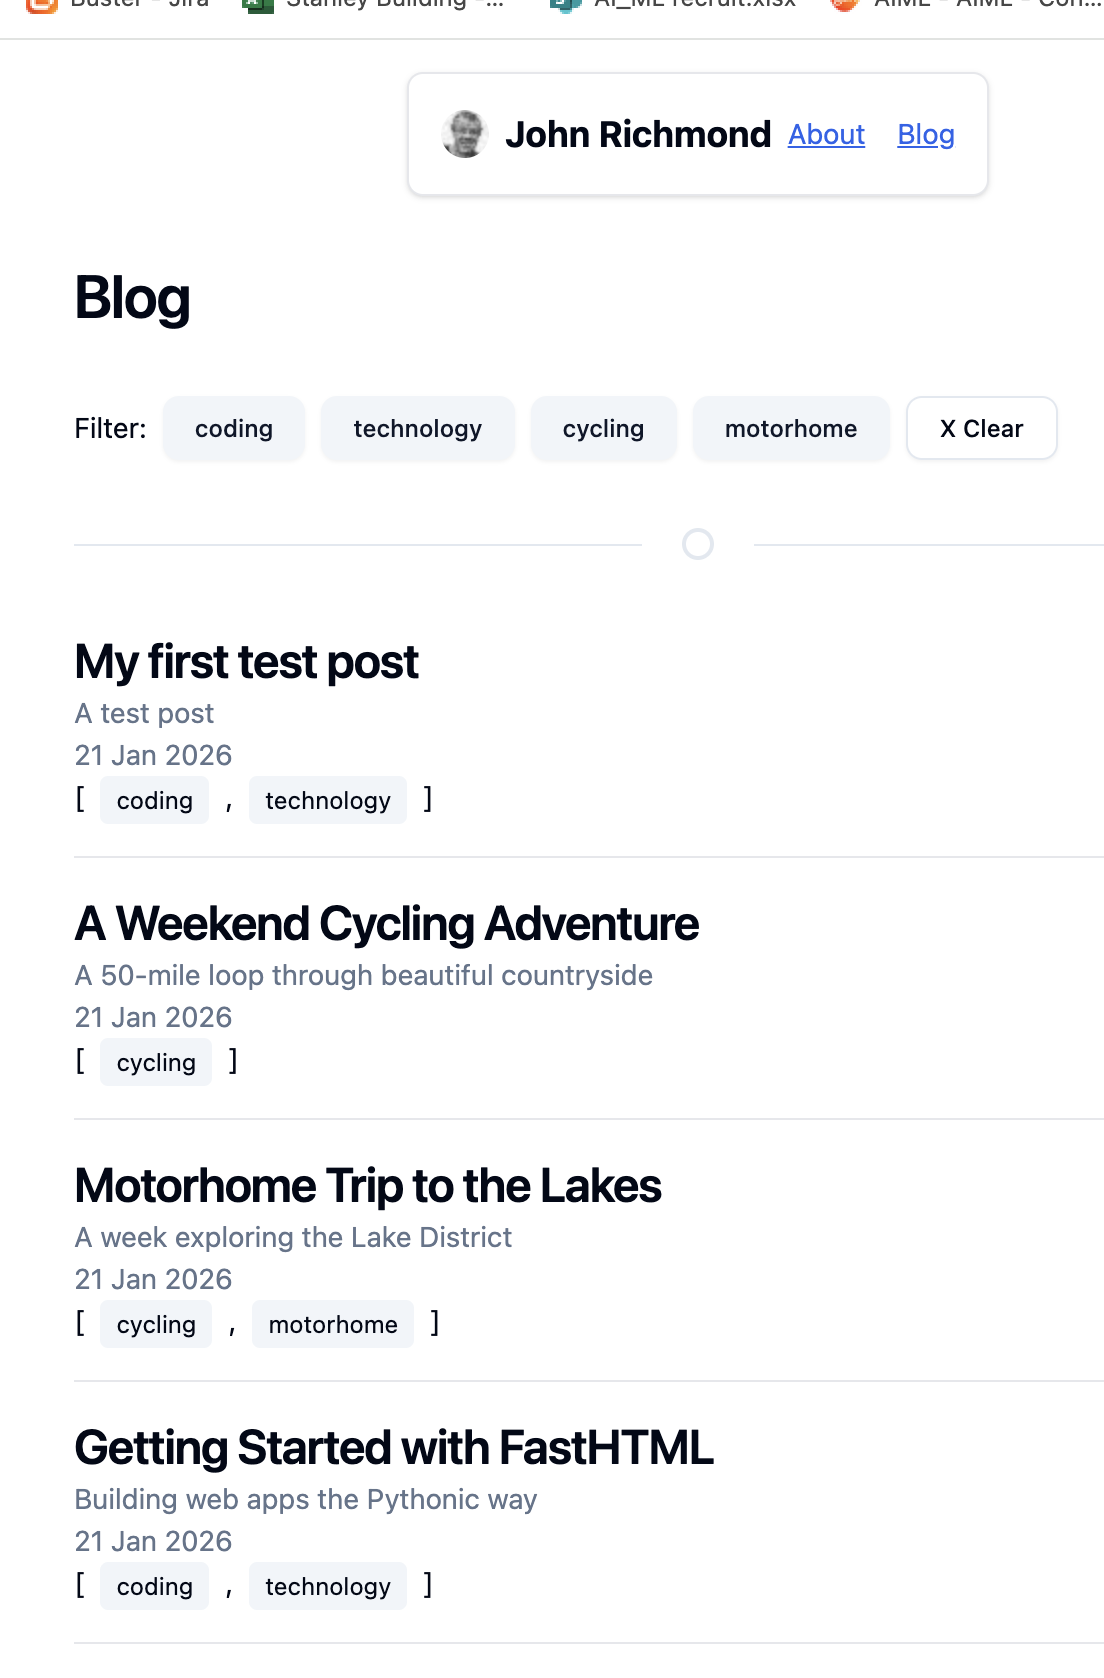

That works but the shadow is so faint its almost invisible, can we increase the emphasis.  What does the -mx-4 do?  I presume cursor-pointer is what activates the hover?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠

**Shadow:** Try `hover:shadow-lg` or `hover:shadow-xl` for more emphasis.

**`-mx-4`:** Negative horizontal margin—pulls the element 1rem outside its container on both sides, making it visually wider than its parent. It counteracts the padding in the layout so the hover background extends edge-to-edge.

**`cursor-pointer`:** Just changes the mouse cursor to a hand—doesn't affect hover. The `hover:` classes trigger on mouse-over regardless of cursor style.

Ok thats working, now I need to add the image if one exists.  Should this be within the A or outside in another A, which will work best with a flex layout?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Keep it inside the same `A`—that way the whole card (text + image) is one clickable area.

Structure would be:
```
A (with flex, gap-4)
├── Div (flex-1, text content)
└── Img (fixed width, e.g. w-24 or w-32)
```

The `flex-1` on the text div lets it fill remaining space, image stays fixed size on the right.

In [ ]:
posts_t[2].content

'\nI set off early on Saturday morning for a 50-mile loop through the countryside.\n\n![Morning mist over the valley](/static/image/post_images/cycling1.jpg)\n\nThe first 20 miles were mostly flat, following the canal towpath. Perfect weather for riding.\n\n## The Climb\n\nAfter the coffee stop, the real challenge began—a 3-mile climb with 400m elevation gain.\n\n![View from the summit](/static/image/post_images/cycling2.jpg)\n\nWorth every pedal stroke for that view at the top.\n'

In [ ]:
from PIL import Image

def load_thumbnail(img_path, max_width=128):
    """Load image and scale to max_width, preserving aspect ratio."""
    img_path = Path(img_path.lstrip('/'))
    img_path = config.STATIC_DIR.parent / img_path
    img = Image.open(img_path)
    ratio = max_width / img.width
    new_size = (max_width, int(img.height * ratio))
    return img.resize(new_size, Image.LANCZOS)

In [ ]:
def get_post_image(p):
    # check post content for image (/static/image/post_images/*)
    # If image found then load a thumbnail of it
    img_ptn = r"!\[.*?\]\((/static/image/post_images/[^)]+)\)"
    imgs = re.findall(img_ptn,p["content"])
    img = imgs[0] if len(imgs)>0 else None
    if img:
        img_path = Path(img)
        img_path = config.STATIC_DIR.parent / img_path
        return img_path
    else:
        return None

In [ ]:
def post_card(p):
    """Create a card to view a summary of the post including
    - Title (linked)
    - Excerpt
    - possible thumbnail image if one is in the post, to the right of the text
    - Date
    - Tags as small pills?
    - Hover effect?
    """
    img_url = get_post_image(p)
    post = Div(cls="flex gap-2 p-3 -mx-3 rounded-lg hover:bg-muted/50 hover:shadow-lg transition-all cursor-pointer")(
        Div(cls="flex-1")(
            A(cls="flex gap-4 block border-b pb-4 transition-colors")(
                Div(H3(p['title']), P(p['excerpt'], cls="text-muted-foreground"),  
                Div(Span(p['created'].strftime('%d %b %Y'), cls="text-sm text-muted-foreground"), Div([tag_badge(tag) for tag in p["tags"]], cls="flex gap-2 flex-wrap")
                )),
                Img(src=img_url, cls="p-4 max-w-48 h-auto object-contain ml-auto") if img_url else None,
                href=f"/blog/{p['slug']}",
                hx_get=f"/blog/{p['slug']}", **hx_attrs()
            )
        # Add image here at a later time
        )
    )
    return post

The current configuration truncates the last image.

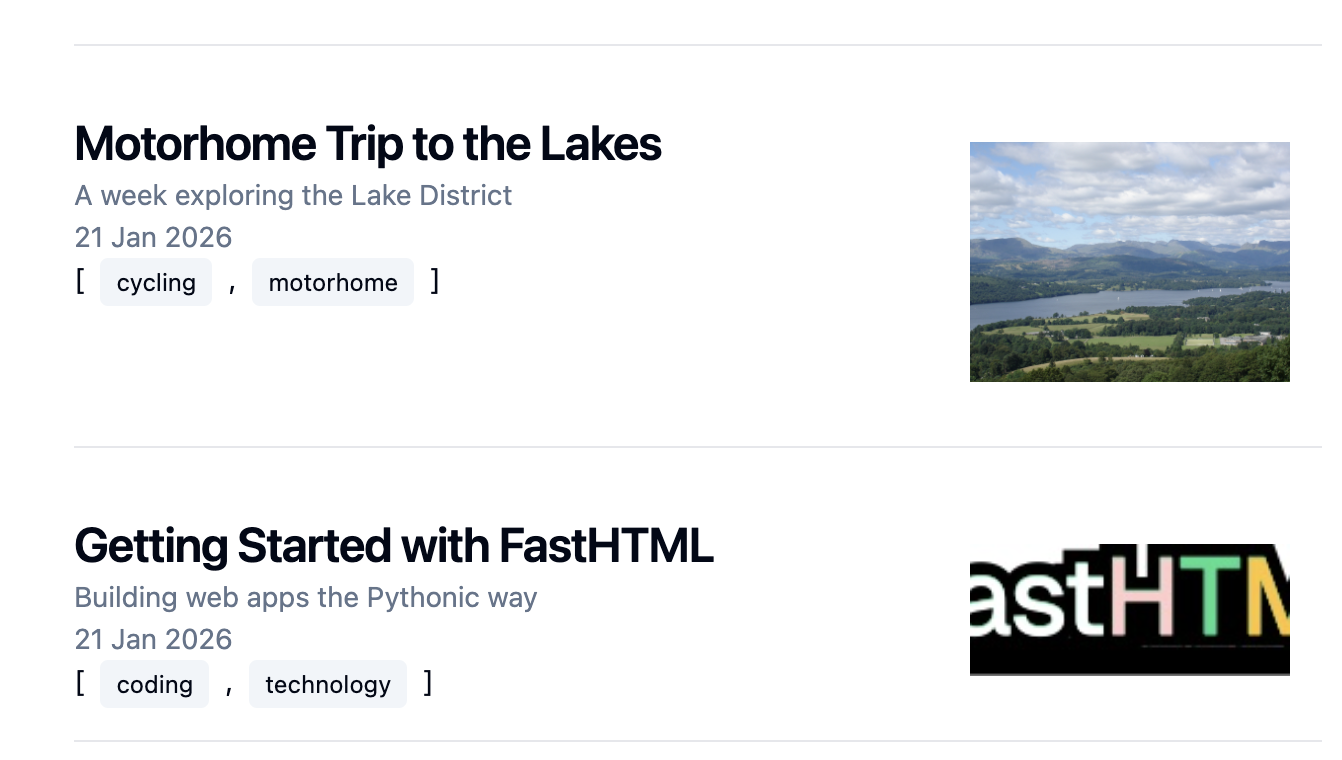

I tried to add max-w-full h-auto but that hasn't solved the problem


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The issue is `w-48` sets a fixed width. When combined with `max-w-full`, the fixed width wins.

Try replacing `w-48` with `max-w-48` (or `max-w-[12rem]`):

```python
Img(src=img_url, cls="p-4 max-w-48 h-auto object-contain ml-auto")
```

Also changed `object-cover` to `object-contain`—cover crops to fill, contain scales to fit.
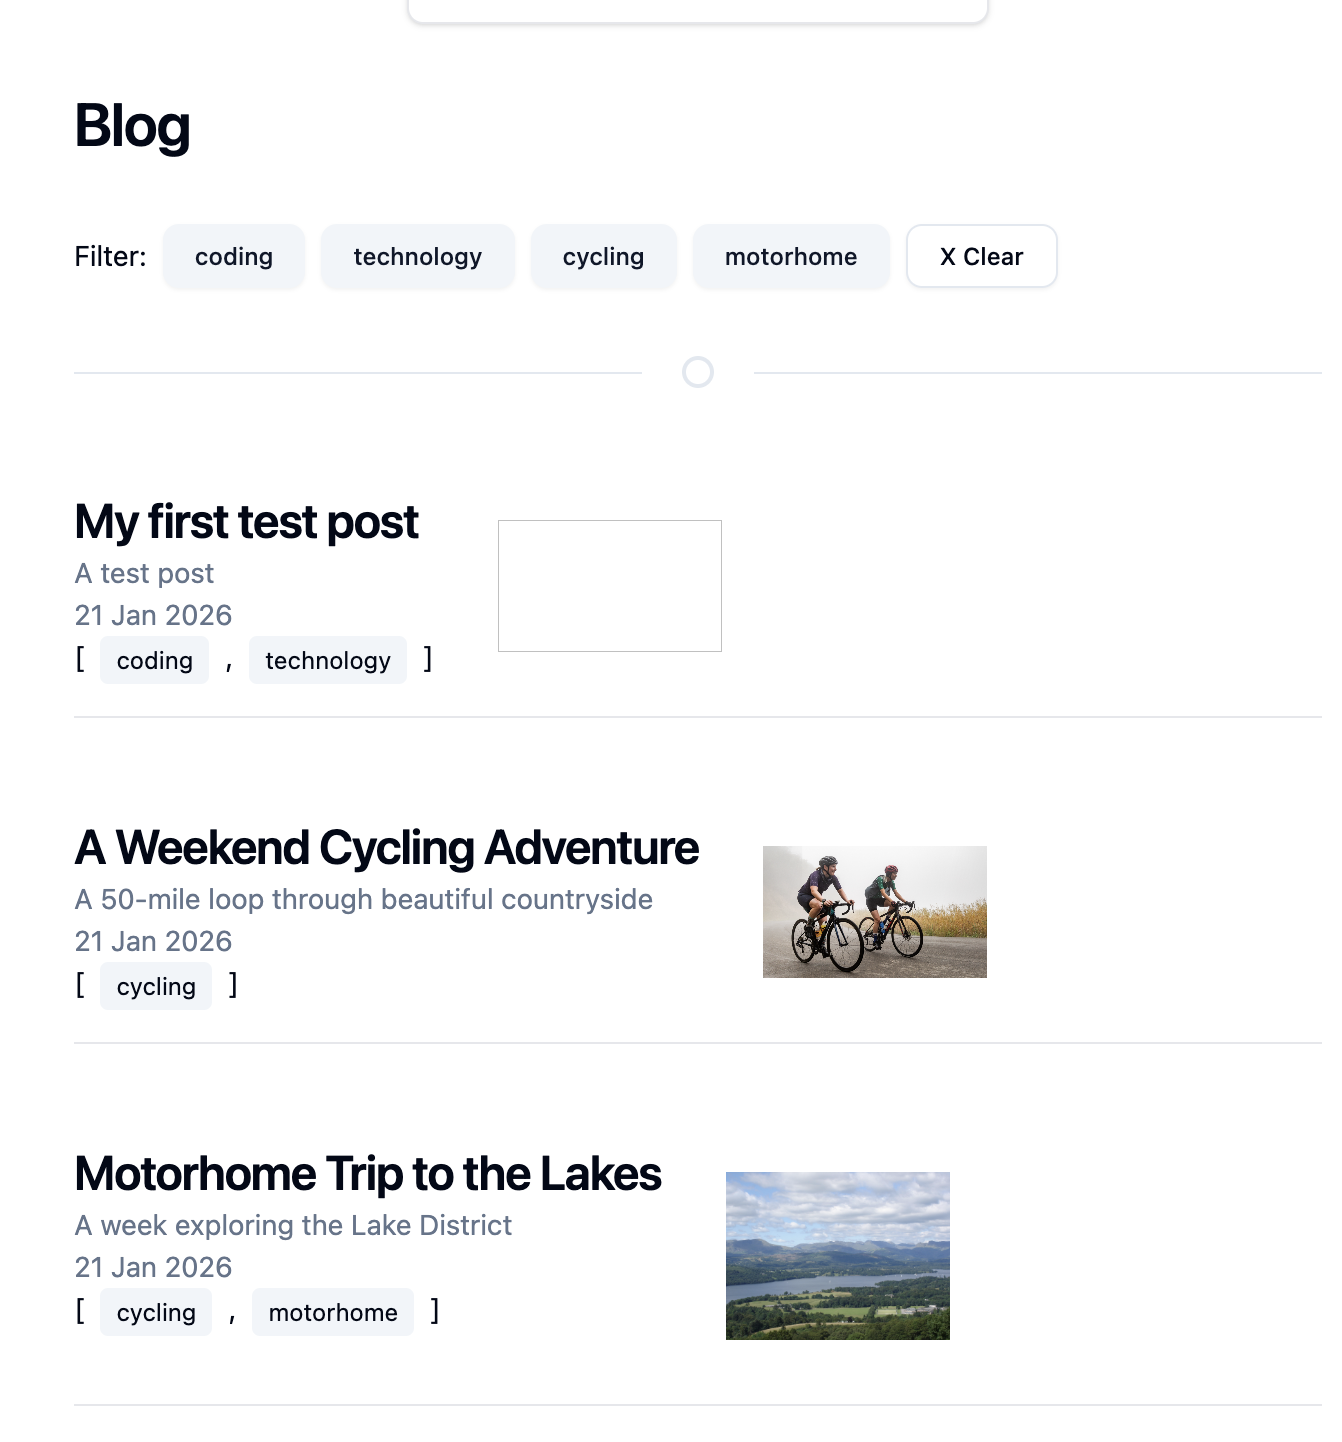
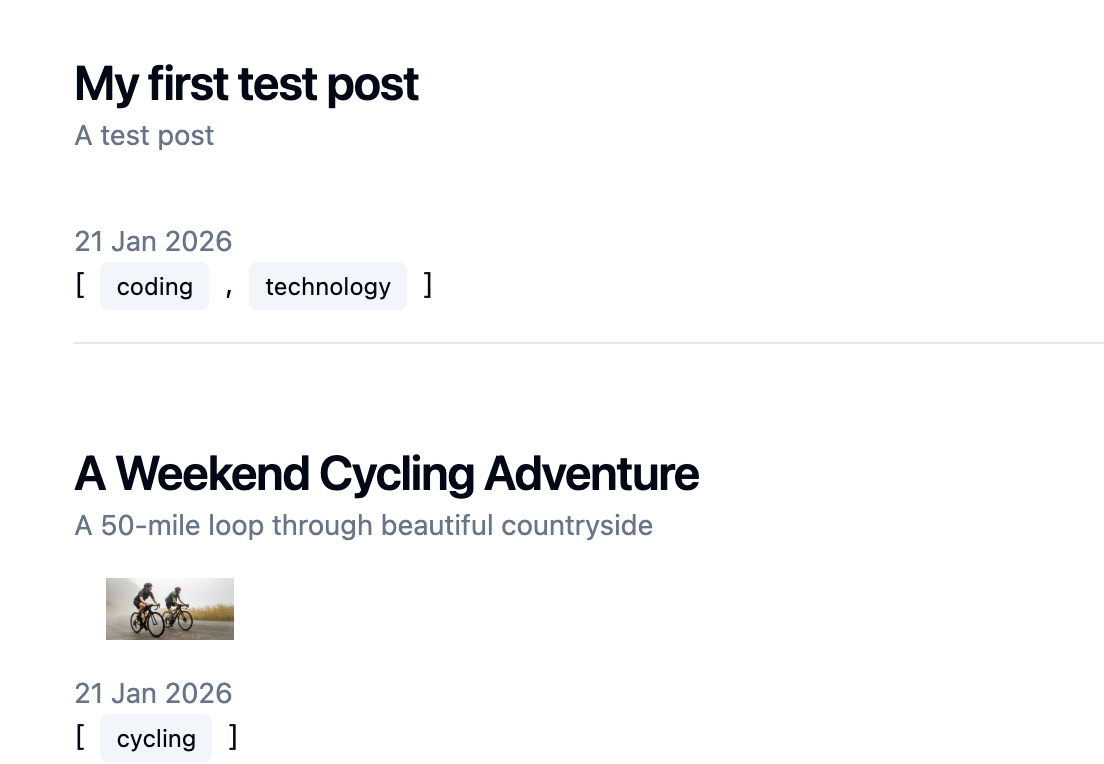

Ok that is working ok.  What is left to do in comparison to the original targets.  One thing we need is to be able to upload and edit posts in the admin panel, what would you say the best way to do this is, I was planning to create posts using Obsidian and then uploading them via a web link, similarly we could delete them via the admin page.  I also need to do the about page as well.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good progress! Comparing to original goals:

**Done:**
- Home page with intro + latest posts
- Blog listing with tag filtering
- Post cards with thumbnails
- Individual post view
- Navbar, footer, layout

**Remaining:**
- About page (content)
- Admin: upload/edit/delete posts
- Theme toggle (deferred)

For the Obsidian workflow, you'd need:
1. An admin route with a form to paste markdown + metadata (title, excerpt, tags)
2. A delete button per post in admin view
3. Possibly an edit form that pre-fills existing content

Which would you like to tackle first—the About page (quick win) or the admin upload form?

THe one I really need to get sorted is the admin side. Is it best to paste teh content into a form or use a file uploader to select files for upload.  The main question for me then is how to bes deal with images

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Two common approaches:

**Option A: Paste markdown into form**
- Simple form with fields for title, excerpt, tags, content
- Upload images separately (to a known folder), reference them by path in markdown

**Option B: File upload**
- Upload .md file, parse frontmatter for title/excerpt/tags
- Still need to handle images separately

Images are the tricky bit either way. Simplest approach: upload images first to `/static/image/post_images/`, then reference them in your markdown using the path you know they'll have.

Which appeals—paste or file upload?

### Add upload form for posts

I think I prefer the file upload if there is an easy way to setup a way to navigate to find the file using fasthtml

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes—use a standard HTML file input. FastHTML handles multipart form data automatically.

Basic structure:
```python
Form(
    Input(type="file", name="mdfile", accept=".md"),
    Button("Upload"),
    method="post", enctype="multipart/form-data"
)
```

The uploaded file arrives in your route as a `UploadFile` object with `.filename` and `.read()` methods.

Want to try creating an admin route at `/admin/upload` that shows this form?

Can you remind me how we are using the route syntax. In the fastHTML docs they seem to use get and post as methods after defining the route as a parameter after @rt.  In our case we are often just having for example @rt, then def blog(htmx):  How does it know if this is a get or post and what are the reasons for puttin the route and parameters after @rt as compared to this approach.  Please provide a fairly detailed explanation that I can cut and paste to my notes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

## FastHTML Routing Syntax

### Basic patterns

**1. Minimal form:**
```python
@rt
def blog(htmx): ...
```
- Route path inferred from function name → `/blog`
- HTTP method defaults to `GET`

**2. Explicit path:**
```python
@rt('/blog/{slug}')
def blogpost(htmx, slug: str): ...
```
- Use when path differs from function name, or has parameters

**3. Explicit method:**
```python
@rt('/admin/upload')
def get(htmx): ...   # handles GET

@rt('/admin/upload')
def post(mdfile: UploadFile): ...   # handles POST
```
- Function named `get`/`post`/`put`/`delete` determines method

### How does it know GET vs POST?

FastHTML uses these rules in order:
1. If function is named `get`, `post`, `put`, `delete` → use that method
2. If route has parameters that typically come from form data → `POST`
3. Otherwise → `GET`

### When to use which?

| Situation | Syntax |
|-----------|--------|
| Simple page, path matches function name | `@rt` + `def mypage():` |
| Path with variables | `@rt('/blog/{slug}')` |
| Form submission (POST) | `@rt('/path')` + `def post():` |
| Same URL, different methods | Two functions: `def get():` and `def post():` |

### Your current usage

You're using the minimal form throughout, which works because:
- All your routes are GET requests
- Function names match the desired paths (`blog` → `/blog`, `index` → `/`)

For your upload form, you'll need both GET (show form) and POST (handle upload), so you'll use the explicit method approach.

Would you advise only passing the file from the form or also supplying separately the excerpt, title etc (if I don't do this then clearly I need these as metadata in the file that can be extracted)

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Both work. Trade-offs:

**Frontmatter in file:**
- Single source of truth
- Matches Obsidian workflow (you can add YAML frontmatter there)
- Portable—the file contains everything
- Example format at top of .md file:
  ```yaml
  ---
  title: My Post
  excerpt: A short summary
  tags: [cycling, tech]
  ---
  ```

**Separate form fields:**
- More explicit UI
- Can validate/edit before saving
- File stays "pure" markdown

Since you're using Obsidian, frontmatter is natural—you'd write posts with metadata already embedded. Then the upload handler just parses it with `python-frontmatter` library (same as Jack's site uses).

Which fits your workflow better?

Lets use the embedded format so that I only have to upload a file (as you say it fits the workflow)

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good choice. You'll need the `python-frontmatter` library—it's already imported in your notebook (`import frontmatter`).

First step: create a GET route at `/admin/upload` that shows the upload form. The form needs:
- File input (accept `.md`)
- Submit button
- Wrapped in a `Form` with `method="post"` and `enctype="multipart/form-data"`

Give it a try—should be similar to your other routes but with a form instead of content.

I can see how to process a file given a name and path but I can't see an examples of using a gui to navigate the file system to find the path and file name using a gui. Do you know of an example or can you suggest a way to do this?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The browser handles this automatically! When you use `<input type="file">`, clicking it opens the native file picker dialog—you don't need to build anything.

```python
Input(type="file", name="mdfile", accept=".md")
```

When the user clicks this input, their browser shows a standard "Open File" dialog to navigate and select a file. The selected file is then submitted with the form.

Would you like to try building the form with this?

In [ ]:
def process_upload(content: bytes, filename: str, slug:str=None):
    # check there is no parent path element and if so just get the filename part
    file_path = Path(filename)
    if file_path.suffix == '.md':
        # post content, extract metadata and save contents to posts table
        md_text = content.decode('utf-8')
        post = frontmatter.loads(md_text)
        # Add checks that the meta data needed is present
        title = post.metadata['title']
        tags = post.metadata['tags']
        excerpt = post.metadata['excerpt']
        slug = title.lower().replace(" ", "-")
        slug = ''.join(c for c in slug if c.isalnum() or c == '-')[:60]
        content_rewritten = rewrite_image_paths(post.content, slug)
        post.content = content_rewritten
        try:
            add_post(title=title, content=post.content, excerpt=excerpt, tags=tags)
        except:
            # add a message that the post could not be added and the failure mode and return to the upload form
            success = False
            message = "Unable to save post"
            return success, message
        return True, "Post saved", slug

    elif file_path.suffix in ['.jpg', '.png', '.jpeg', '.tif', '.svg']:
        # file is an image, save to image folder
        path_to_save = Path(config.POST_IMAGE_DIR) / Path(slug) / file_path.name
        # Create directory if it doen't exist
        path_to_save.parent.mkdir(parents=True, exist_ok=True)
        path_to_save.write_bytes(content)
        return True, f"File {path_to_save.name} saved", slug

    else:
        # unknown file type, raise an error Toast
        return False, f"Unknown file type {filepath.suffix}", slug

#### Test process_upload

In [ ]:
# Save post to database
test_post_name = 'test_post.md'
test_post_path = Path(config.TEST_DIR / test_post_name)
content = test_post_path.read_bytes()
success, message = process_upload(content, test_post_name)
assert success == True
assert message == "Post saved"

In [ ]:
# Delete test post
test_post_ids = list(posts_t.rows_where('"title" == ?', ['This is a test post']))
for test_post in test_post_ids:
    id = test_post['id']
    posts_t.delete(id)
    assert id not in test_post


In [ ]:
# Save image file to static image folder
test_img_name = "test_img.jpg"
test_img_path = Path(config.TEST_DIR / test_img_name)
content = test_img_path.read_bytes()
success, message = process_upload(content, test_img_name)
assert success == True
assert message == f"{test_img_name} saved"
assert Path(config.POST_IMAGE_DIR / Path(test_img_name)).is_file
# Now remove the temporary file
Path(config.POST_IMAGE_DIR / Path(test_img_name))

Path('/app/data/my-blog/static/image/post_images/test_img.jpg')

In [ ]:
@rt('/admin/upload')
def get(htmx):
    # Create file upload form for the post
    return Div(Upload("Upload Button!", id='upload1', multiple=True),
               Div(id='upload-message'),
               UploadZone(DivCentered(Span("Upload Zone"), UkIcon("upload")), id='upload2', accept='.md',
               hx_target='#upload-message', hx_swop='innerHTML'),
               cls='space-y-4')

In [ ]:
@rt('/admin/upload')
def get(htmx):
    # Create file upload form for the post
    return Div(Div(A('Cancel', href='/', cls=f"{ButtonT.secondary} px-4 py-2"), Upload("Upload Button!", id='upload1', multiple=True), cls='flex gap-2'),
               Div(id='upload-message'),
               UploadZone(DivCentered(Span("Upload Zone"), UkIcon("upload")), id='upload2', accept='.md',
               hx_target='#upload-message', hx_swop='innerHTML'),
               cls='space-y-4')

So more questions as to how to get this all to work.  Lets take it a bit at a time and focus initially on the post.  I could be uploading images or posts and so have tried to create a route to process both. Can you check if I am using the file object correctly for images.

For posts i want to extract the metadata so that I can create the post in the database. Jack uses front matter I think you said, and i can see he has a ContentRenderer class.  I guess I will need this to display the posts if i save them with the metadata, or I can extract just the content excluding the metadata and save that. I think i would prefer to do the latter, what would you recomment and how would you go about this.

Finally for now, if I send an alert (for example if the file type is not recognised) should I then raise an alert and then return to the uploader form.  What is the best way to do this or should i take a different approach?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good questions—let's take them one at a time.

**1. Image handling:**
Your image code looks mostly right, but one issue: you're reassigning `file_object` inside the `with` block:
```python
with file_object as fr:
    file_object = fr.read()  # overwrites the variable
```
Better to use a different name: `content = fr.read()`, then `file_path.write_bytes(content)`.

**2. Frontmatter extraction:**
The `python-frontmatter` library does exactly what you want—it separates metadata from content:
```python
import frontmatter
post = frontmatter.loads(md_text)
post.metadata  # dict with title, tags, etc.
post.content   # just the markdown body
```
So you'd save `post.content` to the database and use `post.metadata` for title, excerpt, tags.

**3. Alert + return to form:**
A couple of options:
- Return the alert *and* the form together
- Use HTMX to show a toast notification without replacing the form

Which of these three would you like to tackle first?

Lets tackle them in order, I will sort out the image handling first

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good—make that change (use `content = fr.read()` instead of overwriting `file_object`), and let me know when you're ready for the frontmatter part.

Ok I have changed the image write, I will do the frontmatter now 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great! For frontmatter, you'll need to:

1. Decode the bytes to string: `md_text = content.decode('utf-8')`
2. Parse with frontmatter: `post = frontmatter.loads(md_text)`
3. Access `post.metadata` (dict) and `post.content` (string)

Then call your existing `add_post()` function with the extracted values.

Give it a try—what fields do you expect in the frontmatter YAML?

I have added the front matter code but still have bits to populate. I would like to be able to separate out the file processing but and test it independently then just call it from the post function but as i also want to trigger responses to the user based upon the response i am not sure of the best way to do that, or how to create an uploadfile object to send to test it with.  How would you suggest going about that and also how would ou deal with adding the message for failure and also returning to the login/admin page on success

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good thinking to separate concerns. A few approaches:

**Testing file processing:**
Extract the processing logic into a function that takes bytes + filename, not the UploadFile object:

```python
def process_upload(content: bytes, filename: str) -> tuple[bool, str]:
    # Returns (success, message)
```

Then your route just calls `process_upload(content, file_object.filename)` and handles the response.

For testing, you can call it directly with file bytes:
```python
content = Path("test.md").read_bytes()
success, msg = process_upload(content, "test.md")
```

Does that separation make sense? Then we can discuss how to handle the success/failure responses in the route.

Ok I have created the process_upload file and it seems to pass the simple tests, though i need to implement a way to check with the user that it is ok to overwrite an existing image file, which i haven't done yet. I think I also need to think about how to update an existing post instead of creating a new one, as the best way to edit a post would be to use obsidian and then re-upload it, but to replace an existing post not create a new one.  Can you make suggestions for these operations.  Wh then need to look at how to respond to the success and message returns

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good progress! Let's tackle these one at a time.

**1. Updating existing posts:**
You already have `slug_exists()` which returns the post id if found. Your `add_post()` function already handles updates vs inserts. The key is matching on slug—if someone uploads a post with the same title, it generates the same slug, so it updates.

Is that the behaviour you want, or would you prefer to match on title instead?

No thats fine, I had forgotten that would happen

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good—so that's already sorted.

Next: **image overwrites** or **success/failure responses**—which would you like to tackle first?

Lets sort out the image overwrites

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

A few approaches for confirming overwrites:

1. **Return a confirmation form** — replace the upload area with "File exists, overwrite?" + Yes/No buttons
2. **Auto-rename** — append `_1`, `_2` etc. to avoid conflicts
3. **Always fail** — return error, user must manually delete first via admin

Which feels right for your workflow?

Option 1

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

For option 1, you'll need to:
1. Save the file temporarily (or hold it in a hidden form field)
2. Show the confirmation form with Yes/No buttons
3. On Yes, move/save the file; on No, discard and return to upload

One question: how do you want to pass the file content to the confirmation step? Options:
- Save to a temp file, pass a reference
- Base64 encode in a hidden field (works for small images)

Which seems simpler to you?

The files could be large so I think we should use the temp file option

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good choice. The flow would be:

1. Save file to a temp folder with a unique name
2. Return a confirmation form with hidden fields for temp path + target filename
3. New route handles Yes (move temp→target) or No (delete temp)

For the temp folder, you could use Python's `tempfile` module or create a `static/temp/` folder.

Would you like to try implementing the temp save part first?

In [ ]:
import tempfile
import shutil

TEMP_DIR = Path(tempfile.gettempdir()) / "blog_uploads"
TEMP_DIR.mkdir(exist_ok=True)

def save_to_temp(content: bytes, filename: str) -> Path:
    """Save uploaded content to temp folder, return temp path."""
    temp_path = TEMP_DIR / f"{uuid.uuid4().hex}_{filename}"
    temp_path.write_bytes(content)
    return temp_path

def confirm_overwrite_form(temp_path: Path, target_filename: str):
    """Return a form asking user to confirm overwrite."""
    return Div(
        P(f"File '{target_filename}' already exists. Overwrite?", cls="text-warning"),
        Form(
            Input(type="hidden", name="temp_path", value=str(temp_path)),
            Input(type="hidden", name="target_filename", value=target_filename),
            Button("Yes, overwrite", type="submit", cls=ButtonT.primary),
            Button("Cancel", type="submit", name="cancel", value="true", cls=ButtonT.secondary),
            method="post", action="/admin/confirm-overwrite"
        ),
        cls="space-y-4"
    )

@rt('/admin/confirm-overwrite')
def post(temp_path: str, target_filename: str, cancel: str = None):
    temp_path = Path(temp_path)
    if cancel or not temp_path.exists():
        if temp_path.exists(): temp_path.unlink()
        return RedirectResponse("/admin/upload", status_code=303)
    
    target_path = config.POST_IMAGE_DIR / target_filename
    shutil.move(str(temp_path), str(target_path))
    return RedirectResponse("/admin/upload", status_code=303)

I have adapted the /admin/upload post file to use the above, can you check the implementation looks ok

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>
<summary>find_msgs(re_pattern=@rt\('/admin/upload'\)\ndef post, msg_type=code)</summary>

```json
{
  "id": "toolu_01X45QmcMhvr6dvKSixmhjDW",
  "call": {
    "function": "find_msgs",
    "arguments": {
      "re_pattern": "@rt\\('/admin/upload'\\)\\ndef post",
      "msg_type": "code"
    }
  },
  "result": "[]"
}
```

</details>



<details class='tool-usage-details'>
<summary>find_msgs(re_pattern=admin/upload.*post|def post.*upload, msg_type=code)</summary>

```json
{
  "id": "toolu_01NmNC6gRRH5Po1LexRJRv4c",
  "call": {
    "function": "find_msgs",
    "arguments": {
      "re_pattern": "admin/upload.*post|def post.*upload",
      "msg_type": "code"
    }
  },
  "result": "[{'id': '_1e24938d', 'time_run': '2026-01-25T18:49:12.030034+00:00', 'is_exported': False, 'skipped': False, 'hidden': False, 'bookmark': {}, 'i_collapsed': False, 'o_collapsed': False, 'heading_collapsed': False, 'i_clamp': False, 'o_clamp': False, 'pinned': False, 'content': \"@rt('/admin/upload')    \\ndef post(upload2: list[UploadFile]):\\n    # Note that the parameter name needs to be the id of the uploadfile div\\n    # Process file and add contents to database\\n    for file_object in upload2:\\n        # process each file\\n        name = file_object.filename\\n        with file_object as fr:\\<TRUNCATED>"
}
```

</details>

A few issues:

1. **Variable name mismatch:** You use `filename` but defined it as `name`
2. **Loop logic:** If you have multiple files, the `return` inside the loop exits after the first file—other files won't be processed
3. **Confirm overwrite not wired up:** `process_upload` calls `confirm_overwrite_form()` for image conflicts, but that return value isn't making it back to the user

For #3, your `process_upload` function needs to return the form when overwrite confirmation is needed, and the route needs to detect and return it.

Would you like to tackle the variable name fix first, then work through the loop and overwrite logic?

I used file_path.name as in my workflow the image will be added in obsidian and will have a path that is different to that needed here, where all i want is the filename.  I counerted to a path and then took just the name to get rid of the rest of the path.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Ah yes, that makes sense—`Path(filename).name` strips any directory components. Good.

The remaining issues are:
1. The loop returns after the first file, so multiple uploads won't all process
2. When `process_upload` returns the confirm form for overwrites, it needs to reach the user

Which would you like to address first?

In [ ]:
@rt('/admin/upload')    
def post(upload2: list[UploadFile]):
    # Note that the parameter name needs to be the id of the uploadfile div
    # Process file and add contents to database
    results = []
    for file_object in upload2:
        # process each file
        name = file_object.filename
        with file_object as fr:
            content = fr.read()
        path_name = Path(name)
        success, message = process_upload(content, filename)
        results.append((name, success, message))
        header = ["Name", 'Success', 'Message']
        body = [[result[0], result[1], result[2]] for result in results]
    return Div(
        H2("Post upload results"),
        TableFromLists(header, body)
        )
    #if success: 
    #    # Send div with only toast, hence nothing will be added to the upload_message since the Toast postions itself
    #    return Div(Toast('Post saved successfully!', alert_cls=AlertT.success), id='upload_message', )
    #else:
    #    return Alert(message, cls=AlertT.error) # Automatically sent to upload_message div
        



If you look at the route @rt('/admin/upload') post then each image calls process_upload separately (the function is below this point). I am not sure how to best deal with this as I want to give the user a message to highlight the issue, but it would be good to then continue to save the other parts of the post

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good thinking. A common pattern: collect results as you go, then show a summary at the end.

Instead of returning immediately, build up a list of messages:

```python
results = []
for file_object in upload2:
    success, message = process_upload(content, name)
    results.append((name, success, message))
# After loop, return a Div showing all results
```

For the overwrite confirmation case, you'd need to handle that differently—perhaps queue those files for a second step, or show all confirmations together.

Would you like to try implementing the results collection first?

I have moved the route /admin/upload above and saved results to at table, which i then return. Does this look right? We now need to think how to best deal with any duplicate files.I would suggest we randomise any file names prior to saving and then change the reference in the content, but then that would not work with my workflow when i need to modify a post in obsidian and then re-upload.  I could avoid the problem by adding a the post slug before the image name but then I would need to deal with that when rendering the post.  What would you suggest

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Your table approach looks correct, though the `return` is indented inside the loop—move it outside so all files process first.

For duplicate images, simplest approach: **subfolder per post**. Store images at `/static/image/post_images/{slug}/image.jpg`. Then:
- Same image name in different posts won't conflict
- Re-uploading a post's images just overwrites in that folder
- No changes to rendering needed if you include the slug in your markdown paths

Would that fit your Obsidian workflow?

The issue is that the image name in the post is simply the filename. If i don't know the slug in advance I can't change that easily, hence it makes the workflow cumbersome unless I can add a variable in the markdown which is populated when rendering

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good point. Option: **rewrite image paths at upload time**.

When you process the markdown:
1. Extract the slug from title
2. Find all image paths like `![...](myimage.jpg)`
3. Replace with `![...](/static/image/post_images/{slug}/myimage.jpg)`
4. Save the modified content

So you write normally in Obsidian with just filenames, and the upload process rewrites them.

Would that work for your workflow?

Yes that would work, can you highlight and suggest changes I need to make to implement this approach

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Add a function to rewrite image paths:

```python
def rewrite_image_paths(content: str, slug: str) -> str:
    img_ptn = r"(!\[.*?\])\(([^/)]+\.(jpg|jpeg|png|gif|svg))\)"
    replacement = rf"\1(/static/image/post_images/{slug}/\2)"
    return re.sub(img_ptn, replacement, content, flags=re.IGNORECASE)
```

Then in `process_upload`, after extracting metadata but before calling `add_post`:

```python
slug = title.lower().replace(" ", "-")
slug = ''.join(c for c in slug if c.isalnum() or c == '-')[:60]
content_rewritten = rewrite_image_paths(post.content, slug)
```

And update the `add_post` call to use `content_rewritten`.

For images, create the subfolder based on which post they belong to. You'll need to either:
- Upload images after the post (so slug exists), or
- Include the target slug in the image upload form

Which approach for images?

I have updated the process_upload and admin/upload functions to use the above approach.  Can you check I have done this correctly.  With respect to what happens if only an image is selected for upload then I guess we have to ask for a for a slug, or we only allow upload of images if they are with a post.  We would also have to check if there is a post and process this first. I think this is the best approach or it will get very complicated

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>
<summary>read_msgid(id=_1c71dd57)</summary>

```json
{
  "id": "toolu_01WTqYdULpKszBdaVaxe7NUv",
  "call": {
    "function": "read_msgid",
    "arguments": {
      "id": "_1c71dd57"
    }
  },
  "result": "{'id': '_1c71dd57',\n 'time_run': '2026-01-25T20:50:51.429691+00:00',\n 'is_exported': True,\n 'skipped': False,\n 'hidden': False,\n 'bookmark': {},\n 'i_collapsed': False,\n 'o_collapsed': False,\n 'heading_collapsed': False,\n 'i_clamp': False,\n 'o_clamp': False,\n 'pinned': False,\n 'oob': {},\n 'run': False,\n 'scroll': False,\n 'order': 147,\n 'content': 'def process_upload(content: bytes, filename: str):\\n    # check there is no parent path element and if so just get the filename part\\n    file_path = Path(filename)\\n    if file_path.suffix == \\'.md\\':\\n        # post content, extract metadata and sav<TRUNCATED>"
}
```

</details>



<details class='tool-usage-details'>
<summary>read_msgid(id=_1e24938d)</summary>

```json
{
  "id": "toolu_01UGobC8rottcU58G4fuU215",
  "call": {
    "function": "read_msgid",
    "arguments": {
      "id": "_1e24938d"
    }
  },
  "result": "{'id': '_1e24938d',\n 'time_run': '2026-01-25T20:51:55.151014+00:00',\n 'is_exported': False,\n 'skipped': False,\n 'hidden': False,\n 'bookmark': {},\n 'i_collapsed': False,\n 'o_collapsed': False,\n 'heading_collapsed': False,\n 'i_clamp': False,\n 'o_clamp': False,\n 'pinned': False,\n 'oob': {},\n 'run': False,\n 'scroll': False,\n 'order': 166,\n 'is_hidden': False,\n 'content': '@rt(\\'/admin/upload\\')    \\ndef post(upload2: list[UploadFile]):\\n    # Note that the parameter name needs to be the id of the uploadfile div\\n    # Process file and add contents to database\\n    results = []\\n    for file_object<TRUNCATED>"
}
```

</details>

Issues found:

**In `process_upload`:**
- Image branch uses `slug` but it's only defined in the `.md` branch—images without a prior post will fail

**In `admin/upload` post:**
- Variable mismatch: you call `process_upload(content, filename)` but defined `name = file_object.filename`
- `header` and `body` are inside the loop—move them after

**Suggested fix:** Process posts first, then images. This ensures the slug exists:

```python
@rt('/admin/upload')    
def post(upload2: list[UploadFile]):
    files = [(f.filename, f.file.read()) for f in upload2]
    md_files = [(n, c) for n, c in files if n.endswith('.md')]
    img_files = [(n, c) for n, c in files if not n.endswith('.md')]
    results = []
    slug = None
    for name, content in md_files:
        success, message, slug = process_upload(content, name)
        results.append((name, success, message))
    for name, content in img_files:
        success, message, _ = process_upload(content, name, slug=slug)
        results.append((name, success, message))
    header = ["Name", 'Success', 'Message']
    body = [[r[0], r[1], r[2]] for r in results]
    return Div(H2("Post upload results"), TableFromLists(header, body))
```

You'd also need to update `process_upload` to accept `slug` as a parameter for images and return it for posts.

In [ ]:
@rt('/admin/upload')    
def post(upload2: list[UploadFile]):
    files = [(f.filename, f.file.read()) for f in upload2]
    md_files = [(n, c) for n, c in files if n.endswith('.md')]
    img_files = [(n, c) for n, c in files if not n.endswith('.md')]
    results = []
    slug = None
    if img_files and len(md_files)==0:
        return Div(Alert("Please upload a post (.md file) with images, or upload images separately", cls=AlertT.warning))
    for name, content in md_files:
        success, message, slug = process_upload(content, name)
        results.append((name, success, message))
    for name, content in img_files:
        success, message, _ = process_upload(content, name, slug=slug)
        results.append((name, success, message))
    header = ["Name", 'Success', 'Message']
    body = [[r[0], r[1], r[2]] for r in results]
    return Div(H2("Post upload results"), TableFromLists(header, body))

In [ ]:
def rewrite_image_paths(content: str, slug: str) -> str:
    img_ptn = r"(!\[.*?\])\(([^/)]+\.(jpg|jpeg|png|gif|svg))\)"
    replacement = rf"\1(/static/image/post_images/{slug}/\2)"
    return re.sub(img_ptn, replacement, content, flags=re.IGNORECASE)

I have made the changes, does this look right

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The route looks good—processes markdown first to get the slug, then images.

One thing to check: does `process_upload` now return 3 values `(success, message, slug)` in all branches? The image branch needs to return the slug too (even if just passing it through).

Also, what happens if someone uploads only images with no markdown file? Currently `slug` stays `None` and the image save will likely fail. You might want to add a check:

```python
if img_files and not slug:
    return Div(Alert("Please upload a post (.md file) with images, or upload images separately", cls=AlertT.warning))
```

Would you like to add that guard?

How can I control where the Toast or Alert is send.  I know htmx has a beforebegin that I could apply to id upload2 but I am not sure how to do this from within the route.  Do I need to modify the htmx to set a target for the return?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Toast typically floats at a fixed position (top or bottom of screen)—it handles its own positioning.

For the Alert above the form, add an empty target div in your GET route:
```python
Div(id="upload-message"),  # Alert goes here
UploadZone(...)
```

Then on UploadZone, add `hx_target="#upload-message"` and `hx_swap="innerHTML"`.

The Alert will then swap into that div above the form.

So do I need to return something that will go to the upload-message (even if it is an empty div) and then the toast following that

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, for success you'd return both:
```python
return Div(id="upload-message"), Toast("Post saved!", alert_cls=AlertT.success)
```

The empty Div clears any previous error, and Toast handles its own positioning.

For error, just return the Alert—it swaps into `#upload-message` and the form stays.

In [ ]:
nbdev.nbdev_export()